In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

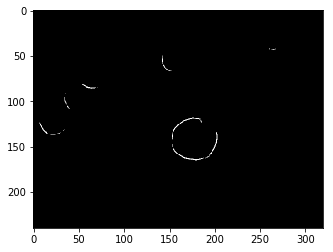

In [3]:
im = cv2.imread("test_results_1/original_normalized_4/DSLC0006-normalized.bmp")
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
plt.imshow(imgray,cmap='gray')

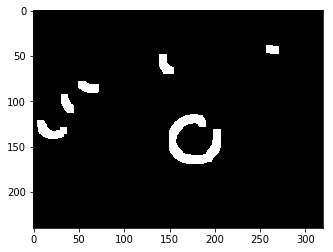

In [4]:
test_im = imgray/255

test_im[test_im>0.5]=1
test_im[test_im<0.5]=0

kernel = np.ones((8,8),np.uint8)   
#opening = cv2.morphologyEx(test_im, cv2.MORPH_OPEN, kernel)
#closing = cv2.morphologyEx(test_im, cv2.MORPH_CLOSE, kernel)
img_dilation = cv2.dilate(test_im, kernel, iterations=1)
img_dilation = cv2.normalize(src=img_dilation, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
plt.imshow(img_dilation,cmap='gray')

In [5]:
im2, contours, hierarchy = cv2.findContours(img_dilation,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [6]:
#cv2.drawContours(im, contours, -1, (0,255,0), 3)

In [7]:
#plt.imshow(im,cmap='gray')

In [8]:
'''
x=[]
y=[]
for i in range(0,len(contours)):
    cnt = contours[i]
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    x.append(cx)
    y.append(cy)
print(x)
print(y)
'''

"\nx=[]\ny=[]\nfor i in range(0,len(contours)):\n    cnt = contours[i]\n    M = cv2.moments(cnt)\n    cx = int(M['m10']/M['m00'])\n    cy = int(M['m01']/M['m00'])\n    x.append(cx)\n    y.append(cy)\nprint(x)\nprint(y)\n"

In [9]:
for cnt in contours:
    hull = cv2.convexHull(cnt)
    #cv2.drawContours(im, [hull], -1, (0, 0, 255), 1)

In [10]:
#print(hull)

In [11]:
im2 = cv2.imread("test_results_1/original_normalized_4/DSLC0006-normalized.bmp")

In [12]:
def find_if_close(cnt1,cnt2):
    row1,row2 = cnt1.shape[0],cnt2.shape[0]
    for i in range(0,row1):
        for j in range(0,row2):
            dist = np.linalg.norm(cnt1[i]-cnt2[j])
            if abs(dist) < 30 :
                return True
            elif i==row1-1 and j==row2-1:
                return False

#img = cv2.imread('dspcnt.jpg')
#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#ret,thresh = cv2.threshold(gray,127,255,0)
_,contours,hier = cv2.findContours(img_dilation,cv2.RETR_EXTERNAL,2)

LENGTH = len(contours)
status = np.zeros((LENGTH,1))

for i,cnt1 in enumerate(contours):
    x = i    
    if i != LENGTH-1:
        for j,cnt2 in enumerate(contours[i+1:]):
            x = x+1
            dist = find_if_close(cnt1,cnt2)
            if dist == True:
                val = min(status[i],status[x])
                status[x] = status[i] = val
            else:
                if status[x]==status[i]:
                    status[x] = i+1

unified = []
maximum = int(status.max())+1
for i in range(0,maximum):
    pos = np.where(status==i)[0]
    if pos.size != 0:
        cont = np.vstack(contours[i] for i in pos)
        #print(cont)
        hull = cv2.convexHull(cont)
        #print (hull)
        unified.append(hull)

#cv2.drawContours(im2,unified,-1,(0,255,0),2)

In [54]:
x=[]
y=[]
for i in range(0,len(unified)):
    cnt = unified[i]
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    x.append(cx)
    y.append(cy)
x=np.array(x)
y=np.array(y)
x=x/10
y=y/10
print(x)
print(y)

[ 3.6 17.7 14.6 26.3]
[11.  14.2  5.9  4.3]


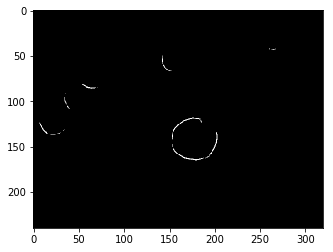

In [13]:
plt.imshow(im2,cmap='gray')

In [14]:
im3 = cv2.imread("test_results_1/original_normalized_4/DSLC0006-normalized.bmp")

In [15]:
black = np.zeros_like(im3)

In [16]:
print(len(unified))

4


In [17]:
i=0
odds = 0
for h in unified:
    #hull = cv2.convexHull(cnt)
    print("i",i)
    i+=1
    img = im3.copy()
    black2 = black.copy()

    #--- Here is where I am filling the contour after finding the convex hull ---
    cv2.drawContours(black2, [h], -1, (255, 255, 255), -1)
    g2 = cv2.cvtColor(black2, cv2.COLOR_BGR2GRAY)
    r, t2 = cv2.threshold(g2, 127, 255, cv2.THRESH_BINARY)
    #cv2.imshow("t2.jpg", t2)

    masked = cv2.bitwise_and(im3, im3, mask = t2) 
    masked=cv2.cvtColor(masked,cv2.COLOR_BGR2GRAY)
    #masked[masked>127]=1
    #masked[masked<127]=0
    M = cv2.moments(h)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    cx=cx/10
    cy=cy/10
    height, width = masked.shape[:2]
    ymax = int(height/10)
    xmax = int(width/10)
    masked = cv2.resize(masked,(int(height/10), int(width/10)))
    
    for theta in range (0,360):
        theta = 0.5*theta
        print(theta)
        r=1
        x1=1
        y1=1
        intersects=0        
        #cx=cx/10
        #cy=cy/10
        while(x1<xmax-1 and y1<ymax-1 and x1>-1 and y1>-1):
            x=r*math.cos(math.radians(theta))
            y=r*math.sin(math.radians(theta))
            x1=int(x+cx)
            y1=int(y+cy)
            #print(x1,y1)
            if(masked[x1][y1]==1):
                intersects+=1
            #print("r",r)
            r+=0.5
        
        r=1
        x1=1
        y1=1
        while(x1>-1 and y1>-1 and x1<xmax-1 and y1<ymax-1):
            x=r*math.cos(math.radians(theta))
            y=r*math.sin(math.radians(theta))
            x1=int(x+cx)
            y1=int(y+cy)
            print(x1,y1)
            if(masked[x1][y1]):
                intersects+=1
            r-=0.5 
            
               
        print("intersects",intersects)   
        if (intersects%2):
            odds+=1
    print("odds",odds)
    cv2.imwrite("masked"+str(i)+".jpg", masked)
    i=i+1


i 0
0.0
4 11
r 1
5 11
r 1.5
5 11
r 2.0
6 11
r 2.5
6 11
r 3.0
7 11
r 3.5
7 11
r 4.0
8 11
r 4.5
8 11
r 5.0
9 11
r 5.5
9 11
r 6.0
10 11
r 6.5
10 11
r 7.0
11 11
r 7.5
11 11
r 8.0
12 11
r 8.5
12 11
r 9.0
13 11
r 9.5
13 11
r 10.0
14 11
r 10.5
14 11
r 11.0
15 11
r 11.5
15 11
r 12.0
16 11
r 12.5
16 11
r 13.0
17 11
r 13.5
17 11
r 14.0
18 11
r 14.5
18 11
r 15.0
19 11
r 15.5
19 11
r 16.0
20 11
r 16.5
20 11
r 17.0
21 11
r 17.5
21 11
r 18.0
22 11
r 18.5
22 11
r 19.0
23 11
r 19.5
23 11
r 20.0
24 11
r 20.5
24 11
r 21.0
25 11
r 21.5
25 11
r 22.0
26 11
r 22.5
26 11
r 23.0
27 11
r 23.5
27 11
r 24.0
28 11
r 24.5
28 11
r 25.0
29 11
r 25.5
29 11
r 26.0
30 11
r 26.5
30 11
r 27.0
31 11
r 27.5
4 11
4 11
3 11
3 11
2 11
2 11
1 11
1 11
0 11
0 11
0 11
0 11
-1 11
intersects 0
0.5
4 11
r 1
5 11
r 1.5
5 11
r 2.0
6 11
r 2.5
6 11
r 3.0
7 11
r 3.5
7 11
r 4.0
8 11
r 4.5
8 11
r 5.0
9 11
r 5.5
9 11
r 6.0
10 11
r 6.5
10 11
r 7.0
11 11
r 7.5
11 11
r 8.0
12 11
r 8.5
12 11
r 9.0
13 11
r 9.5
13 11
r 10.0
14 11
r 10.5
14 11
r 1

r 22.5
26 13
r 23.0
26 13
r 23.5
27 13
r 24.0
27 13
r 24.5
28 13
r 25.0
28 13
r 25.5
29 13
r 26.0
29 13
r 26.5
30 14
r 27.0
30 14
r 27.5
31 14
r 28.0
4 11
4 11
3 11
3 10
2 10
2 10
1 10
1 10
0 10
0 10
0 10
0 10
-1 10
intersects 0
7.0
4 11
r 1
5 11
r 1.5
5 11
r 2.0
6 11
r 2.5
6 11
r 3.0
7 11
r 3.5
7 11
r 4.0
8 11
r 4.5
8 11
r 5.0
9 11
r 5.5
9 11
r 6.0
10 11
r 6.5
10 11
r 7.0
11 11
r 7.5
11 11
r 8.0
12 12
r 8.5
12 12
r 9.0
13 12
r 9.5
13 12
r 10.0
14 12
r 10.5
14 12
r 11.0
15 12
r 11.5
15 12
r 12.0
16 12
r 12.5
16 12
r 13.0
16 12
r 13.5
17 12
r 14.0
17 12
r 14.5
18 12
r 15.0
18 12
r 15.5
19 12
r 16.0
19 13
r 16.5
20 13
r 17.0
20 13
r 17.5
21 13
r 18.0
21 13
r 18.5
22 13
r 19.0
22 13
r 19.5
23 13
r 20.0
23 13
r 20.5
24 13
r 21.0
24 13
r 21.5
25 13
r 22.0
25 13
r 22.5
26 13
r 23.0
26 13
r 23.5
27 13
r 24.0
27 13
r 24.5
28 14
r 25.0
28 14
r 25.5
29 14
r 26.0
29 14
r 26.5
30 14
r 27.0
30 14
r 27.5
31 14
r 28.0
4 11
4 11
3 11
3 10
2 10
2 10
1 10
1 10
0 10
0 10
0 10
0 10
-1 10
intersects 0
7.5


r 3.5
7 11
r 4.0
7 11
r 4.5
8 12
r 5.0
8 12
r 5.5
9 12
r 6.0
9 12
r 6.5
10 12
r 7.0
10 12
r 7.5
11 12
r 8.0
11 12
r 8.5
12 12
r 9.0
12 13
r 9.5
13 13
r 10.0
13 13
r 10.5
14 13
r 11.0
14 13
r 11.5
15 13
r 12.0
15 13
r 12.5
16 13
r 13.0
16 13
r 13.5
17 14
r 14.0
17 14
r 14.5
18 14
r 15.0
18 14
r 15.5
19 14
r 16.0
19 14
r 16.5
20 14
r 17.0
20 14
r 17.5
21 14
r 18.0
21 15
r 18.5
22 15
r 19.0
22 15
r 19.5
23 15
r 20.0
23 15
r 20.5
24 15
r 21.0
24 15
r 21.5
25 15
r 22.0
25 15
r 22.5
26 15
r 23.0
26 16
r 23.5
27 16
r 24.0
27 16
r 24.5
28 16
r 25.0
28 16
r 25.5
28 16
r 26.0
29 16
r 26.5
29 16
r 27.0
30 16
r 27.5
30 17
r 28.0
31 17
r 28.5
4 11
4 11
3 11
3 10
2 10
2 10
1 10
1 10
0 10
0 10
0 10
0 10
-1 9
intersects 0
13.0
4 11
r 1
5 11
r 1.5
5 11
r 2.0
6 11
r 2.5
6 11
r 3.0
7 11
r 3.5
7 11
r 4.0
7 12
r 4.5
8 12
r 5.0
8 12
r 5.5
9 12
r 6.0
9 12
r 6.5
10 12
r 7.0
10 12
r 7.5
11 12
r 8.0
11 12
r 8.5
12 13
r 9.0
12 13
r 9.5
13 13
r 10.0
13 13
r 10.5
14 13
r 11.0
14 13
r 11.5
15 13
r 12.0
15 13
r 12.5

r 16.0
19 16
r 16.5
19 16
r 17.0
20 16
r 17.5
20 16
r 18.0
21 16
r 18.5
21 17
r 19.0
22 17
r 19.5
22 17
r 20.0
23 17
r 20.5
23 17
r 21.0
23 17
r 21.5
24 17
r 22.0
24 18
r 22.5
25 18
r 23.0
25 18
r 23.5
26 18
r 24.0
26 18
r 24.5
27 18
r 25.0
27 19
r 25.5
28 19
r 26.0
28 19
r 26.5
29 19
r 27.0
29 19
r 27.5
30 19
r 28.0
30 20
r 28.5
31 20
r 29.0
4 11
4 11
3 11
3 10
2 10
2 10
1 10
1 10
0 10
0 9
0 9
0 9
-1 9
intersects 0
19.0
4 11
r 1
5 11
r 1.5
5 11
r 2.0
5 11
r 2.5
6 11
r 3.0
6 12
r 3.5
7 12
r 4.0
7 12
r 4.5
8 12
r 5.0
8 12
r 5.5
9 12
r 6.0
9 13
r 6.5
10 13
r 7.0
10 13
r 7.5
11 13
r 8.0
11 13
r 8.5
12 13
r 9.0
12 14
r 9.5
13 14
r 10.0
13 14
r 10.5
14 14
r 11.0
14 14
r 11.5
14 14
r 12.0
15 15
r 12.5
15 15
r 13.0
16 15
r 13.5
16 15
r 14.0
17 15
r 14.5
17 15
r 15.0
18 16
r 15.5
18 16
r 16.0
19 16
r 16.5
19 16
r 17.0
20 16
r 17.5
20 16
r 18.0
21 17
r 18.5
21 17
r 19.0
22 17
r 19.5
22 17
r 20.0
22 17
r 20.5
23 17
r 21.0
23 17
r 21.5
24 18
r 22.0
24 18
r 22.5
25 18
r 23.0
25 18
r 23.5
26 18
r 2

r 27.5
28 22
r 28.0
29 23
r 28.5
4 11
4 11
3 11
3 10
2 10
2 10
1 10
1 9
0 9
0 9
0 9
0 9
0 8
-1 8
intersects 0
25.5
4 11
r 1
4 11
r 1.5
5 11
r 2.0
5 12
r 2.5
6 12
r 3.0
6 12
r 3.5
7 12
r 4.0
7 12
r 4.5
8 13
r 5.0
8 13
r 5.5
9 13
r 6.0
9 13
r 6.5
9 14
r 7.0
10 14
r 7.5
10 14
r 8.0
11 14
r 8.5
11 14
r 9.0
12 15
r 9.5
12 15
r 10.0
13 15
r 10.5
13 15
r 11.0
13 15
r 11.5
14 16
r 12.0
14 16
r 12.5
15 16
r 13.0
15 16
r 13.5
16 17
r 14.0
16 17
r 14.5
17 17
r 15.0
17 17
r 15.5
18 17
r 16.0
18 18
r 16.5
18 18
r 17.0
19 18
r 17.5
19 18
r 18.0
20 18
r 18.5
20 19
r 19.0
21 19
r 19.5
21 19
r 20.0
22 19
r 20.5
22 20
r 21.0
23 20
r 21.5
23 20
r 22.0
23 20
r 22.5
24 20
r 23.0
24 21
r 23.5
25 21
r 24.0
25 21
r 24.5
26 21
r 25.0
26 21
r 25.5
27 22
r 26.0
27 22
r 26.5
27 22
r 27.0
28 22
r 27.5
28 23
r 28.0
4 11
4 11
3 11
3 10
2 10
2 10
1 10
1 9
0 9
0 9
0 9
0 9
0 8
-1 8
intersects 0
26.0
4 11
r 1
4 11
r 1.5
5 11
r 2.0
5 12
r 2.5
6 12
r 3.0
6 12
r 3.5
7 12
r 4.0
7 12
r 4.5
8 13
r 5.0
8 13
r 5.5
8 13
r 6.0
9 

0 8
0 8
-1 8
intersects 0
33.0
4 11
r 1
4 11
r 1.5
5 12
r 2.0
5 12
r 2.5
6 12
r 3.0
6 12
r 3.5
6 13
r 4.0
7 13
r 4.5
7 13
r 5.0
8 13
r 5.5
8 14
r 6.0
9 14
r 6.5
9 14
r 7.0
9 15
r 7.5
10 15
r 8.0
10 15
r 8.5
11 15
r 9.0
11 16
r 9.5
11 16
r 10.0
12 16
r 10.5
12 16
r 11.0
13 17
r 11.5
13 17
r 12.0
14 17
r 12.5
14 18
r 13.0
14 18
r 13.5
15 18
r 14.0
15 18
r 14.5
16 19
r 15.0
16 19
r 15.5
17 19
r 16.0
17 19
r 16.5
17 20
r 17.0
18 20
r 17.5
18 20
r 18.0
19 21
r 18.5
19 21
r 19.0
19 21
r 19.5
20 21
r 20.0
20 22
r 20.5
21 22
r 21.0
21 22
r 21.5
22 22
r 22.0
22 23
r 22.5
4 11
4 11
3 11
3 10
2 10
2 10
1 9
1 9
1 9
0 9
0 8
0 8
0 8
-1 8
intersects 0
33.5
4 11
r 1
4 11
r 1.5
5 12
r 2.0
5 12
r 2.5
6 12
r 3.0
6 12
r 3.5
6 13
r 4.0
7 13
r 4.5
7 13
r 5.0
8 14
r 5.5
8 14
r 6.0
9 14
r 6.5
9 14
r 7.0
9 15
r 7.5
10 15
r 8.0
10 15
r 8.5
11 15
r 9.0
11 16
r 9.5
11 16
r 10.0
12 16
r 10.5
12 17
r 11.0
13 17
r 11.5
13 17
r 12.0
14 17
r 12.5
14 18
r 13.0
14 18
r 13.5
15 18
r 14.0
15 19
r 14.5
16 19
r 15.0
16 19
r

3 10
2 10
2 10
2 9
1 9
1 9
0 8
0 8
0 8
0 7
0 7
0 7
-1 6
intersects 0
41.0
4 11
r 1
4 11
r 1.5
5 12
r 2.0
5 12
r 2.5
5 12
r 3.0
6 13
r 3.5
6 13
r 4.0
6 13
r 4.5
7 14
r 5.0
7 14
r 5.5
8 14
r 6.0
8 15
r 6.5
8 15
r 7.0
9 15
r 7.5
9 16
r 8.0
10 16
r 8.5
10 16
r 9.0
10 17
r 9.5
11 17
r 10.0
11 17
r 10.5
11 18
r 11.0
12 18
r 11.5
12 18
r 12.0
13 19
r 12.5
13 19
r 13.0
13 19
r 13.5
14 20
r 14.0
14 20
r 14.5
14 20
r 15.0
15 21
r 15.5
15 21
r 16.0
16 21
r 16.5
16 22
r 17.0
16 22
r 17.5
17 22
r 18.0
17 23
r 18.5
4 11
3 11
3 11
3 10
2 10
2 10
2 9
1 9
1 9
0 8
0 8
0 8
0 7
0 7
0 7
-1 6
intersects 0
41.5
4 11
r 1
4 11
r 1.5
5 12
r 2.0
5 12
r 2.5
5 12
r 3.0
6 13
r 3.5
6 13
r 4.0
6 13
r 4.5
7 14
r 5.0
7 14
r 5.5
8 14
r 6.0
8 15
r 6.5
8 15
r 7.0
9 15
r 7.5
9 16
r 8.0
9 16
r 8.5
10 16
r 9.0
10 17
r 9.5
11 17
r 10.0
11 17
r 10.5
11 18
r 11.0
12 18
r 11.5
12 18
r 12.0
12 19
r 12.5
13 19
r 13.0
13 19
r 13.5
14 20
r 14.0
14 20
r 14.5
14 20
r 15.0
15 21
r 15.5
15 21
r 16.0
15 21
r 16.5
16 22
r 17.0
16 22
r 17.

r 10.0
10 18
r 10.5
10 19
r 11.0
11 19
r 11.5
11 20
r 12.0
11 20
r 12.5
12 20
r 13.0
12 21
r 13.5
12 21
r 14.0
13 22
r 14.5
13 22
r 15.0
13 22
r 15.5
13 23
r 16.0
4 11
3 11
3 11
3 10
2 10
2 9
2 9
1 9
1 8
1 8
1 7
0 7
0 7
0 6
0 6
0 6
0 5
-1 5
intersects 0
50.0
4 11
r 1
4 12
r 1.5
4 12
r 2.0
5 12
r 2.5
5 13
r 3.0
5 13
r 3.5
6 14
r 4.0
6 14
r 4.5
6 14
r 5.0
7 15
r 5.5
7 15
r 6.0
7 15
r 6.5
8 16
r 7.0
8 16
r 7.5
8 17
r 8.0
9 17
r 8.5
9 17
r 9.0
9 18
r 9.5
10 18
r 10.0
10 19
r 10.5
10 19
r 11.0
10 19
r 11.5
11 20
r 12.0
11 20
r 12.5
11 20
r 13.0
12 21
r 13.5
12 21
r 14.0
12 22
r 14.5
13 22
r 15.0
13 22
r 15.5
13 23
r 16.0
4 11
3 11
3 11
3 10
2 10
2 9
2 9
1 9
1 8
1 8
1 7
0 7
0 7
0 6
0 6
0 6
0 5
-1 5
intersects 0
50.5
4 11
r 1
4 12
r 1.5
4 12
r 2.0
5 12
r 2.5
5 13
r 3.0
5 13
r 3.5
6 14
r 4.0
6 14
r 4.5
6 14
r 5.0
7 15
r 5.5
7 15
r 6.0
7 16
r 6.5
8 16
r 7.0
8 16
r 7.5
8 17
r 8.0
9 17
r 8.5
9 17
r 9.0
9 18
r 9.5
9 18
r 10.0
10 19
r 10.5
10 19
r 11.0
10 19
r 11.5
11 20
r 12.0
11 20
r 12.5
11 21
r

7 18
r 8.5
8 18
r 9.0
8 19
r 9.5
8 19
r 10.0
9 20
r 10.5
9 20
r 11.0
9 20
r 11.5
9 21
r 12.0
10 21
r 12.5
10 22
r 13.0
10 22
r 13.5
10 23
r 14.0
4 11
3 11
3 11
3 10
3 10
2 9
2 9
2 8
2 8
1 7
1 7
1 7
1 6
0 6
0 5
0 5
0 4
0 4
0 4
0 3
-1 3
intersects 0
59.5
4 11
r 1
4 12
r 1.5
4 12
r 2.0
4 13
r 2.5
5 13
r 3.0
5 14
r 3.5
5 14
r 4.0
5 14
r 4.5
6 15
r 5.0
6 15
r 5.5
6 16
r 6.0
6 16
r 6.5
7 17
r 7.0
7 17
r 7.5
7 17
r 8.0
7 18
r 8.5
8 18
r 9.0
8 19
r 9.5
8 19
r 10.0
8 20
r 10.5
9 20
r 11.0
9 20
r 11.5
9 21
r 12.0
9 21
r 12.5
10 22
r 13.0
10 22
r 13.5
10 23
r 14.0
4 11
3 11
3 11
3 10
3 10
2 9
2 9
2 8
2 8
1 7
1 7
1 7
1 6
0 6
0 5
0 5
0 4
0 4
0 4
0 3
0 3
-1 2
intersects 0
60.0
4 11
r 1
4 12
r 1.5
4 12
r 2.0
4 13
r 2.5
5 13
r 3.0
5 14
r 3.5
5 14
r 4.0
5 14
r 4.5
6 15
r 5.0
6 15
r 5.5
6 16
r 6.0
6 16
r 6.5
7 17
r 7.0
7 17
r 7.5
7 17
r 8.0
7 18
r 8.5
8 18
r 9.0
8 19
r 9.5
8 19
r 10.0
8 20
r 10.5
9 20
r 11.0
9 20
r 11.5
9 21
r 12.0
9 21
r 12.5
10 22
r 13.0
10 22
r 13.5
10 23
r 14.0
4 11
3 11
3 11
3 10
3

2 9
2 8
2 8
2 7
2 7
2 6
2 6
1 5
1 5
1 4
1 4
1 3
1 3
0 2
0 2
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 -1
intersects 0
72.0
3 11
r 1
4 12
r 1.5
4 12
r 2.0
4 13
r 2.5
4 13
r 3.0
4 14
r 3.5
4 14
r 4.0
4 15
r 4.5
5 15
r 5.0
5 16
r 5.5
5 16
r 6.0
5 17
r 6.5
5 17
r 7.0
5 18
r 7.5
6 18
r 8.0
6 19
r 8.5
6 19
r 9.0
6 20
r 9.5
6 20
r 10.0
6 20
r 10.5
6 21
r 11.0
7 21
r 11.5
7 22
r 12.0
7 22
r 12.5
7 23
r 13.0
3 11
3 11
3 11
3 10
3 10
3 9
2 9
2 8
2 8
2 7
2 7
2 6
2 6
1 5
1 5
1 4
1 4
1 3
1 3
0 2
0 2
0 1
0 1
0 1
0 0
0 0
0 0
0 0
0 -1
intersects 0
72.5
3 11
r 1
4 12
r 1.5
4 12
r 2.0
4 13
r 2.5
4 13
r 3.0
4 14
r 3.5
4 14
r 4.0
4 15
r 4.5
5 15
r 5.0
5 16
r 5.5
5 16
r 6.0
5 17
r 6.5
5 17
r 7.0
5 18
r 7.5
6 18
r 8.0
6 19
r 8.5
6 19
r 9.0
6 20
r 9.5
6 20
r 10.0
6 21
r 10.5
6 21
r 11.0
7 21
r 11.5
7 22
r 12.0
7 22
r 12.5
7 23
r 13.0
3 11
3 11
3 11
3 10
3 10
3 9
2 9
2 8
2 8
2 7
2 7
2 6
2 6
1 5
1 5
1 4
1 4
1 3
1 3
1 2
0 2
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 -1
intersects 0
73.0
3 11
r 1
4 12
r 1.5
4 12
r 2.0
4 13
r 2.5
4 13
r 

r 7.0
4 18
r 7.5
4 18
r 8.0
4 19
r 8.5
4 19
r 9.0
4 20
r 9.5
4 20
r 10.0
4 21
r 10.5
4 21
r 11.0
4 22
r 11.5
4 22
r 12.0
4 23
r 12.5
3 11
3 11
3 11
3 10
3 10
3 9
3 9
3 8
3 8
3 7
3 7
3 6
3 6
3 5
3 5
2 4
2 4
2 3
2 3
2 2
2 2
2 1
2 1
2 0
2 0
2 0
2 0
2 -1
intersects 0
85.0
3 11
r 1
3 12
r 1.5
3 12
r 2.0
3 13
r 2.5
3 13
r 3.0
3 14
r 3.5
3 14
r 4.0
3 15
r 4.5
4 15
r 5.0
4 16
r 5.5
4 16
r 6.0
4 17
r 6.5
4 17
r 7.0
4 18
r 7.5
4 18
r 8.0
4 19
r 8.5
4 19
r 9.0
4 20
r 9.5
4 20
r 10.0
4 21
r 10.5
4 21
r 11.0
4 22
r 11.5
4 22
r 12.0
4 23
r 12.5
3 11
3 11
3 11
3 10
3 10
3 9
3 9
3 8
3 8
3 7
3 7
3 6
3 6
3 5
3 5
3 4
2 4
2 3
2 3
2 2
2 2
2 1
2 1
2 0
2 0
2 0
2 0
2 -1
intersects 0
85.5
3 11
r 1
3 12
r 1.5
3 12
r 2.0
3 13
r 2.5
3 13
r 3.0
3 14
r 3.5
3 14
r 4.0
3 15
r 4.5
3 15
r 5.0
4 16
r 5.5
4 16
r 6.0
4 17
r 6.5
4 17
r 7.0
4 18
r 7.5
4 18
r 8.0
4 19
r 8.5
4 19
r 9.0
4 20
r 9.5
4 20
r 10.0
4 21
r 10.5
4 21
r 11.0
4 22
r 11.5
4 22
r 12.0
4 23
r 12.5
3 11
3 11
3 11
3 10
3 10
3 9
3 9
3 8
3 8
3 7
3 7
3 6
3 6
3 

4 0
4 0
4 0
4 -1
intersects 0
96.0
3 11
r 1
3 12
r 1.5
3 12
r 2.0
3 13
r 2.5
3 13
r 3.0
3 14
r 3.5
3 14
r 4.0
3 15
r 4.5
3 15
r 5.0
3 16
r 5.5
2 16
r 6.0
2 17
r 6.5
2 17
r 7.0
2 18
r 7.5
2 18
r 8.0
2 19
r 8.5
2 19
r 9.0
2 20
r 9.5
2 20
r 10.0
2 21
r 10.5
2 21
r 11.0
2 22
r 11.5
2 22
r 12.0
2 23
r 12.5
3 11
3 11
3 11
3 10
3 10
3 9
3 9
3 8
3 8
3 7
4 7
4 6
4 6
4 5
4 5
4 4
4 4
4 3
4 3
4 2
4 2
4 1
4 1
4 0
4 0
4 0
4 0
4 -1
intersects 0
96.5
3 11
r 1
3 12
r 1.5
3 12
r 2.0
3 13
r 2.5
3 13
r 3.0
3 14
r 3.5
3 14
r 4.0
3 15
r 4.5
3 15
r 5.0
2 16
r 5.5
2 16
r 6.0
2 17
r 6.5
2 17
r 7.0
2 18
r 7.5
2 18
r 8.0
2 19
r 8.5
2 19
r 9.0
2 20
r 9.5
2 20
r 10.0
2 21
r 10.5
2 21
r 11.0
2 22
r 11.5
2 22
r 12.0
2 23
r 12.5
3 11
3 11
3 11
3 10
3 10
3 9
3 9
3 8
3 8
3 7
4 7
4 6
4 6
4 5
4 5
4 4
4 4
4 3
4 3
4 2
4 2
4 1
4 1
4 0
4 0
4 0
4 0
5 -1
intersects 0
97.0
3 11
r 1
3 12
r 1.5
3 12
r 2.0
3 13
r 2.5
3 13
r 3.0
3 14
r 3.5
3 14
r 4.0
3 15
r 4.5
2 15
r 5.0
2 16
r 5.5
2 16
r 6.0
2 17
r 6.5
2 17
r 7.0
2 18
r 7.5
2 18


5 4
5 4
5 3
5 3
6 2
6 2
6 1
6 1
6 0
6 0
6 0
7 0
7 0
7 -1
intersects 0
107.0
3 11
r 1
3 12
r 1.5
3 12
r 2.0
2 13
r 2.5
2 13
r 3.0
2 14
r 3.5
2 14
r 4.0
2 15
r 4.5
2 15
r 5.0
1 16
r 5.5
1 16
r 6.0
1 17
r 6.5
1 17
r 7.0
1 18
r 7.5
1 18
r 8.0
1 19
r 8.5
0 19
r 9.0
0 20
r 9.5
0 20
r 10.0
0 21
r 10.5
0 21
r 11.0
0 21
r 11.5
0 22
r 12.0
0 22
r 12.5
0 23
r 13.0
3 11
3 11
3 11
3 10
3 10
4 9
4 9
4 8
4 8
4 7
4 7
4 6
5 6
5 5
5 5
5 4
5 4
5 3
5 3
6 2
6 2
6 1
6 1
6 0
6 0
6 0
7 0
7 0
7 -1
intersects 0
107.5
3 11
r 1
3 12
r 1.5
2 12
r 2.0
2 13
r 2.5
2 13
r 3.0
2 14
r 3.5
2 14
r 4.0
2 15
r 4.5
2 15
r 5.0
1 16
r 5.5
1 16
r 6.0
1 17
r 6.5
1 17
r 7.0
1 18
r 7.5
1 18
r 8.0
1 19
r 8.5
0 19
r 9.0
0 20
r 9.5
0 20
r 10.0
0 21
r 10.5
0 21
r 11.0
0 21
r 11.5
0 22
r 12.0
0 22
r 12.5
0 23
r 13.0
3 11
3 11
3 11
3 10
3 10
4 9
4 9
4 8
4 8
4 7
4 7
4 6
5 6
5 5
5 5
5 4
5 4
5 3
6 3
6 2
6 2
6 1
6 1
6 0
6 0
7 0
7 0
7 0
7 -1
intersects 0
108.0
3 11
r 1
3 12
r 1.5
2 12
r 2.0
2 13
r 2.5
2 13
r 3.0
2 14
r 3.5
2 14
r 4.0
2 15
r 

r 5.5
0 16
r 6.0
0 16
r 6.5
0 17
r 7.0
0 17
r 7.5
0 17
r 8.0
0 18
r 8.5
0 18
r 9.0
-1 19
r 9.5
3 11
3 11
3 11
3 10
4 10
4 9
4 9
4 8
5 8
5 7
5 7
5 7
6 6
6 6
6 5
6 5
7 4
7 4
7 4
7 3
8 3
8 2
8 2
8 1
9 1
9 1
9 0
9 0
10 0
10 0
10 -1
intersects 0
120.5
3 11
r 1
2 12
r 1.5
2 12
r 2.0
2 13
r 2.5
2 13
r 3.0
1 14
r 3.5
1 14
r 4.0
1 14
r 4.5
1 15
r 5.0
0 15
r 5.5
0 16
r 6.0
0 16
r 6.5
0 17
r 7.0
0 17
r 7.5
0 17
r 8.0
0 18
r 8.5
0 18
r 9.0
-1 19
r 9.5
3 11
3 11
3 11
3 10
4 10
4 9
4 9
4 8
5 8
5 7
5 7
5 7
6 6
6 6
6 5
6 5
7 4
7 4
7 4
7 3
8 3
8 2
8 2
8 1
9 1
9 1
9 0
9 0
10 0
10 0
10 -1
intersects 0
121.0
3 11
r 1
2 12
r 1.5
2 12
r 2.0
2 13
r 2.5
2 13
r 3.0
1 14
r 3.5
1 14
r 4.0
1 14
r 4.5
1 15
r 5.0
0 15
r 5.5
0 16
r 6.0
0 16
r 6.5
0 17
r 7.0
0 17
r 7.5
0 17
r 8.0
0 18
r 8.5
-1 18
r 9.0
3 11
3 11
3 11
3 10
4 10
4 9
4 9
4 8
5 8
5 7
5 7
5 7
6 6
6 6
6 5
6 5
7 4
7 4
7 4
7 3
8 3
8 2
8 2
9 1
9 1
9 1
9 0
10 0
10 0
10 0
10 -1
intersects 0
121.5
3 11
r 1
2 12
r 1.5
2 12
r 2.0
2 13
r 2.5
2 13
r 3.0
1 13
r 3.5
1

6 8
6 7
7 7
7 7
7 6
8 6
8 6
8 5
9 5
9 5
10 4
10 4
10 3
11 3
11 3
11 2
12 2
12 2
12 1
13 1
13 1
13 0
14 0
14 0
15 0
15 0
15 0
16 -1
intersects 0
136.0
2 11
r 1
2 12
r 1.5
2 12
r 2.0
1 12
r 2.5
1 13
r 3.0
1 13
r 3.5
0 13
r 4.0
0 14
r 4.5
0 14
r 5.0
0 14
r 5.5
0 15
r 6.0
-1 15
r 6.5
2 11
3 11
3 11
3 10
4 10
4 9
5 9
5 9
5 8
6 8
6 8
6 7
7 7
7 7
7 6
8 6
8 6
8 5
9 5
9 5
10 4
10 4
10 4
11 3
11 3
11 3
12 2
12 2
12 1
13 1
13 1
14 0
14 0
14 0
15 0
15 0
15 0
16 -1
intersects 0
136.5
2 11
r 1
2 12
r 1.5
2 12
r 2.0
1 12
r 2.5
1 13
r 3.0
1 13
r 3.5
0 13
r 4.0
0 14
r 4.5
0 14
r 5.0
0 14
r 5.5
0 15
r 6.0
-1 15
r 6.5
2 11
3 11
3 11
3 10
4 10
4 9
5 9
5 9
5 8
6 8
6 8
6 7
7 7
7 7
7 6
8 6
8 6
9 5
9 5
9 5
10 4
10 4
10 4
11 3
11 3
11 3
12 2
12 2
13 2
13 1
13 1
14 1
14 0
14 0
15 0
15 0
15 0
16 -1
intersects 0
137.0
2 11
r 1
2 12
r 1.5
2 12
r 2.0
1 12
r 2.5
1 13
r 3.0
1 13
r 3.5
0 13
r 4.0
0 14
r 4.5
0 14
r 5.0
0 14
r 5.5
0 15
r 6.0
-1 15
r 6.5
2 11
3 11
3 11
3 10
4 10
4 9
5 9
5 9
5 8
6 8
6 8
6 7
7 7
7 7
7 6
8 

15 3
16 3
16 2
17 2
17 2
18 2
18 1
18 1
19 1
19 1
20 0
20 0
21 0
21 0
21 0
22 0
22 0
23 -1
intersects 0
149.0
2 11
r 1
2 11
r 1.5
1 12
r 2.0
1 12
r 2.5
1 12
r 3.0
0 12
r 3.5
0 13
r 4.0
0 13
r 4.5
0 13
r 5.0
-1 13
r 5.5
2 11
3 11
3 11
4 10
4 10
4 10
5 9
5 9
6 9
6 9
7 8
7 8
7 8
8 8
8 7
9 7
9 7
10 7
10 6
10 6
11 6
11 6
12 5
12 5
13 5
13 5
13 4
14 4
14 4
15 4
15 3
16 3
16 3
16 3
17 2
17 2
18 2
18 1
19 1
19 1
19 1
20 0
20 0
21 0
21 0
22 0
22 0
22 0
23 0
23 -1
intersects 0
149.5
2 11
r 1
2 11
r 1.5
1 12
r 2.0
1 12
r 2.5
1 12
r 3.0
0 12
r 3.5
0 13
r 4.0
0 13
r 4.5
0 13
r 5.0
-1 13
r 5.5
2 11
3 11
3 11
4 10
4 10
4 10
5 9
5 9
6 9
6 9
7 8
7 8
7 8
8 8
8 7
9 7
9 7
10 7
10 6
10 6
11 6
11 6
12 5
12 5
13 5
13 5
13 4
14 4
14 4
15 4
15 3
16 3
16 3
16 3
17 2
17 2
18 2
18 2
19 1
19 1
19 1
20 1
20 0
21 0
21 0
22 0
22 0
22 0
23 0
23 0
24 -1
intersects 0
150.0
2 11
r 1
2 11
r 1.5
1 12
r 2.0
1 12
r 2.5
1 12
r 3.0
0 12
r 3.5
0 13
r 4.0
0 13
r 4.5
0 13
r 5.0
-1 13
r 5.5
2 11
3 11
3 11
4 10
4 10
4 10
5 10
5 9
6

r 1
2 11
r 1.5
1 11
r 2.0
1 11
r 2.5
0 11
r 3.0
0 12
r 3.5
0 12
r 4.0
0 12
r 4.5
-1 12
r 5.0
2 11
3 11
3 11
4 10
4 10
5 10
5 10
5 10
6 10
6 9
7 9
7 9
8 9
8 9
9 9
9 8
10 8
10 8
11 8
11 8
12 8
12 7
13 7
13 7
14 7
14 7
14 7
15 7
15 6
16 6
16 6
17 6
17 6
18 6
18 5
19 5
19 5
20 5
20 5
21 5
21 4
22 4
22 4
23 4
23 4
23 4
24 4
24 3
25 3
25 3
26 3
26 3
27 3
27 2
28 2
28 2
29 2
29 2
30 2
30 1
31 1
intersects 0
162.0
2 11
r 1
2 11
r 1.5
1 11
r 2.0
1 11
r 2.5
0 11
r 3.0
0 12
r 3.5
0 12
r 4.0
0 12
r 4.5
-1 12
r 5.0
2 11
3 11
3 11
4 10
4 10
5 10
5 10
5 10
6 10
6 9
7 9
7 9
8 9
8 9
9 9
9 8
10 8
10 8
11 8
11 8
12 8
12 8
13 7
13 7
14 7
14 7
15 7
15 7
15 6
16 6
16 6
17 6
17 6
18 6
18 6
19 5
19 5
20 5
20 5
21 5
21 5
22 4
22 4
23 4
23 4
24 4
24 4
24 4
25 3
25 3
26 3
26 3
27 3
27 3
28 2
28 2
29 2
29 2
30 2
30 2
31 2
intersects 0
162.5
2 11
r 1
2 11
r 1.5
1 11
r 2.0
1 11
r 2.5
0 11
r 3.0
0 12
r 3.5
0 12
r 4.0
0 12
r 4.5
-1 12
r 5.0
2 11
3 11
3 11
4 10
4 10
5 10
5 10
5 10
6 10
6 9
7 9
7 9
8 9
8 9
9 9
9 9
10 8

r 5.0
2 11
3 11
3 11
4 10
4 10
5 10
5 10
6 10
6 10
7 10
7 10
8 10
8 10
9 10
9 10
10 10
10 10
11 10
11 10
12 10
12 10
13 10
13 9
14 9
14 9
15 9
15 9
16 9
16 9
17 9
17 9
18 9
18 9
19 9
19 9
20 9
20 9
21 9
21 9
21 9
22 9
22 8
23 8
23 8
24 8
24 8
25 8
25 8
26 8
26 8
27 8
27 8
28 8
28 8
29 8
29 8
30 8
30 8
31 8
intersects 0
174.5
2 11
r 1
2 11
r 1.5
1 11
r 2.0
1 11
r 2.5
0 11
r 3.0
0 11
r 3.5
0 11
r 4.0
0 11
r 4.5
-1 11
r 5.0
2 11
3 11
3 11
4 10
4 10
5 10
5 10
6 10
6 10
7 10
7 10
8 10
8 10
9 10
9 10
10 10
10 10
11 10
11 10
12 10
12 10
13 10
13 10
14 9
14 9
15 9
15 9
16 9
16 9
17 9
17 9
18 9
18 9
19 9
19 9
20 9
20 9
21 9
21 9
22 9
22 9
23 9
23 9
24 9
24 8
25 8
25 8
25 8
26 8
26 8
27 8
27 8
28 8
28 8
29 8
29 8
30 8
30 8
31 8
intersects 0
175.0
2 11
r 1
2 11
r 1.5
1 11
r 2.0
1 11
r 2.5
0 11
r 3.0
0 11
r 3.5
0 11
r 4.0
0 11
r 4.5
-1 11
r 5.0
2 11
3 11
3 11
4 10
4 10
5 10
5 10
6 10
6 10
7 10
7 10
8 10
8 10
9 10
9 10
10 10
10 10
11 10
11 10
12 10
12 10
13 10
13 10
14 10
14 10
15 9
15 9
16 9
16 9


22 14
r 4.5
22 14
r 5.0
23 14
r 5.5
23 14
r 6.0
24 14
r 6.5
24 14
r 7.0
25 14
r 7.5
25 14
r 8.0
26 14
r 8.5
26 14
r 9.0
27 14
r 9.5
27 14
r 10.0
28 14
r 10.5
28 14
r 11.0
29 14
r 11.5
29 14
r 12.0
30 14
r 12.5
30 14
r 13.0
31 14
r 13.5
18 14
18 14
17 14
17 14
16 14
16 14
15 14
15 14
14 14
14 14
13 13
13 13
12 13
12 13
11 13
11 13
10 13
10 13
9 13
9 13
8 13
8 13
7 13
7 13
6 13
6 13
5 13
5 13
4 13
4 13
3 13
3 13
2 13
2 13
1 13
1 13
0 13
0 13
0 13
0 13
-1 13
intersects 0
3.5
18 14
r 1
19 14
r 1.5
19 14
r 2.0
20 14
r 2.5
20 14
r 3.0
21 14
r 3.5
21 14
r 4.0
22 14
r 4.5
22 14
r 5.0
23 14
r 5.5
23 14
r 6.0
24 14
r 6.5
24 14
r 7.0
25 14
r 7.5
25 14
r 8.0
26 14
r 8.5
26 14
r 9.0
27 14
r 9.5
27 14
r 10.0
28 14
r 10.5
28 14
r 11.0
29 14
r 11.5
29 14
r 12.0
30 14
r 12.5
30 14
r 13.0
31 15
r 13.5
18 14
18 14
17 14
17 14
16 14
16 14
15 14
15 14
14 14
14 13
13 13
13 13
12 13
12 13
11 13
11 13
10 13
10 13
9 13
9 13
8 13
8 13
7 13
7 13
6 13
6 13
5 13
5 13
4 13
4 13
3 13
3 13
2 13
2 13
1 13
1 13
0 13
0 

0 10
-1 10
intersects 0
11.0
18 14
r 1
19 14
r 1.5
19 14
r 2.0
20 14
r 2.5
20 14
r 3.0
21 14
r 3.5
21 14
r 4.0
22 15
r 4.5
22 15
r 5.0
23 15
r 5.5
23 15
r 6.0
24 15
r 6.5
24 15
r 7.0
25 15
r 7.5
25 15
r 8.0
26 15
r 8.5
26 15
r 9.0
27 16
r 9.5
27 16
r 10.0
28 16
r 10.5
28 16
r 11.0
28 16
r 11.5
29 16
r 12.0
29 16
r 12.5
30 16
r 13.0
30 16
r 13.5
31 16
r 14.0
18 14
18 14
17 14
17 14
16 14
16 13
15 13
15 13
14 13
14 13
13 13
13 13
12 13
12 13
11 13
11 12
10 12
10 12
9 12
9 12
8 12
8 12
7 12
7 12
6 12
6 12
5 11
5 11
4 11
4 11
3 11
3 11
2 11
2 11
1 11
1 11
1 10
0 10
0 10
0 10
0 10
-1 10
intersects 0
11.5
18 14
r 1
19 14
r 1.5
19 14
r 2.0
20 14
r 2.5
20 14
r 3.0
21 14
r 3.5
21 14
r 4.0
22 15
r 4.5
22 15
r 5.0
23 15
r 5.5
23 15
r 6.0
24 15
r 6.5
24 15
r 7.0
25 15
r 7.5
25 15
r 8.0
26 15
r 8.5
26 15
r 9.0
27 16
r 9.5
27 16
r 10.0
27 16
r 10.5
28 16
r 11.0
28 16
r 11.5
29 16
r 12.0
29 16
r 12.5
30 16
r 13.0
30 16
r 13.5
31 16
r 14.0
18 14
18 14
17 14
17 14
16 14
16 13
15 13
15 13
14 13
14 13
13

r 8.0
25 16
r 8.5
26 17
r 9.0
26 17
r 9.5
27 17
r 10.0
27 17
r 10.5
28 17
r 11.0
28 17
r 11.5
29 18
r 12.0
29 18
r 12.5
30 18
r 13.0
30 18
r 13.5
30 18
r 14.0
31 18
r 14.5
18 14
18 14
17 14
17 14
16 13
16 13
15 13
15 13
14 13
14 13
13 12
13 12
12 12
12 12
12 12
11 12
11 11
10 11
10 11
9 11
9 11
8 11
8 11
7 10
7 10
6 10
6 10
5 10
5 10
4 9
4 9
3 9
3 9
3 9
2 9
2 8
1 8
1 8
0 8
0 8
0 8
0 8
-1 7
intersects 0
19.0
18 14
r 1
19 14
r 1.5
19 14
r 2.0
20 15
r 2.5
20 15
r 3.0
21 15
r 3.5
21 15
r 4.0
21 15
r 4.5
22 15
r 5.0
22 15
r 5.5
23 16
r 6.0
23 16
r 6.5
24 16
r 7.0
24 16
r 7.5
25 16
r 8.0
25 16
r 8.5
26 17
r 9.0
26 17
r 9.5
27 17
r 10.0
27 17
r 10.5
28 17
r 11.0
28 17
r 11.5
29 18
r 12.0
29 18
r 12.5
29 18
r 13.0
30 18
r 13.5
30 18
r 14.0
31 18
r 14.5
18 14
18 14
17 14
17 14
16 13
16 13
15 13
15 13
14 13
14 13
13 12
13 12
12 12
12 12
12 12
11 12
11 11
10 11
10 11
9 11
9 11
8 11
8 10
7 10
7 10
6 10
6 10
5 10
5 9
4 9
4 9
3 9
3 9
3 9
2 8
2 8
1 8
1 8
0 8
0 8
0 8
0 7
-1 7
intersects 0
19.5
18 14
r

-1 5
intersects 0
26.0
18 14
r 1
19 14
r 1.5
19 15
r 2.0
19 15
r 2.5
20 15
r 3.0
20 15
r 3.5
21 15
r 4.0
21 16
r 4.5
22 16
r 5.0
22 16
r 5.5
23 16
r 6.0
23 17
r 6.5
23 17
r 7.0
24 17
r 7.5
24 17
r 8.0
25 17
r 8.5
25 18
r 9.0
26 18
r 9.5
26 18
r 10.0
27 18
r 10.5
27 19
r 11.0
28 19
r 11.5
28 19
r 12.0
28 19
r 12.5
29 19
r 13.0
29 20
r 13.5
30 20
r 14.0
30 20
r 14.5
31 20
r 15.0
18 14
18 14
17 14
17 13
16 13
16 13
15 13
15 13
15 12
14 12
14 12
13 12
13 12
12 11
12 11
11 11
11 11
10 10
10 10
10 10
9 10
9 10
8 9
8 9
7 9
7 9
6 8
6 8
6 8
5 8
5 8
4 7
4 7
3 7
3 7
2 6
2 6
1 6
1 6
1 6
0 5
0 5
0 5
0 5
-1 4
intersects 0
26.5
18 14
r 1
19 14
r 1.5
19 15
r 2.0
19 15
r 2.5
20 15
r 3.0
20 15
r 3.5
21 15
r 4.0
21 16
r 4.5
22 16
r 5.0
22 16
r 5.5
23 16
r 6.0
23 17
r 6.5
23 17
r 7.0
24 17
r 7.5
24 17
r 8.0
25 17
r 8.5
25 18
r 9.0
26 18
r 9.5
26 18
r 10.0
27 18
r 10.5
27 19
r 11.0
27 19
r 11.5
28 19
r 12.0
28 19
r 12.5
29 20
r 13.0
29 20
r 13.5
30 20
r 14.0
30 20
r 14.5
31 20
r 15.0
18 14
18 14
17 14
17 1

r 4.0
21 16
r 4.5
21 16
r 5.0
22 17
r 5.5
22 17
r 6.0
23 17
r 6.5
23 18
r 7.0
23 18
r 7.5
24 18
r 8.0
24 18
r 8.5
25 19
r 9.0
25 19
r 9.5
25 19
r 10.0
26 20
r 10.5
26 20
r 11.0
27 20
r 11.5
27 20
r 12.0
28 21
r 12.5
28 21
r 13.0
28 21
r 13.5
29 22
r 14.0
29 22
r 14.5
30 22
r 15.0
30 22
r 15.5
30 23
r 16.0
18 14
18 14
17 14
17 13
16 13
16 13
16 13
15 12
15 12
14 12
14 11
13 11
13 11
13 11
12 10
12 10
11 10
11 10
11 9
10 9
10 9
9 8
9 8
8 8
8 8
8 7
7 7
7 7
6 6
6 6
6 6
5 6
5 5
4 5
4 5
4 4
3 4
3 4
2 4
2 3
1 3
1 3
1 3
0 2
0 2
0 2
0 1
0 1
-1 1
intersects 0
34.5
18 14
r 1
18 15
r 1.5
19 15
r 2.0
19 15
r 2.5
20 15
r 3.0
20 16
r 3.5
20 16
r 4.0
21 16
r 4.5
21 17
r 5.0
22 17
r 5.5
22 17
r 6.0
23 17
r 6.5
23 18
r 7.0
23 18
r 7.5
24 18
r 8.0
24 19
r 8.5
25 19
r 9.0
25 19
r 9.5
25 19
r 10.0
26 20
r 10.5
26 20
r 11.0
27 20
r 11.5
27 20
r 12.0
28 21
r 12.5
28 21
r 13.0
28 21
r 13.5
29 22
r 14.0
29 22
r 14.5
30 22
r 15.0
30 22
r 15.5
30 23
r 16.0
18 14
18 14
17 14
17 13
16 13
16 13
16 13
15 12
15 12
14

4 2
3 2
3 1
2 1
2 1
2 0
1 0
1 0
0 0
0 0
0 0
0 -1
intersects 0
41.0
18 14
r 1
18 15
r 1.5
19 15
r 2.0
19 15
r 2.5
19 16
r 3.0
20 16
r 3.5
20 16
r 4.0
21 17
r 4.5
21 17
r 5.0
21 17
r 5.5
22 18
r 6.0
22 18
r 6.5
22 18
r 7.0
23 19
r 7.5
23 19
r 8.0
24 19
r 8.5
24 20
r 9.0
24 20
r 9.5
25 20
r 10.0
25 21
r 10.5
26 21
r 11.0
26 21
r 11.5
26 22
r 12.0
27 22
r 12.5
27 22
r 13.0
27 23
r 13.5
18 14
18 14
17 14
17 13
16 13
16 13
16 12
15 12
15 12
15 11
14 11
14 11
13 10
13 10
13 10
12 9
12 9
12 9
11 8
11 8
10 8
10 7
10 7
9 7
9 6
9 6
8 6
8 5
7 5
7 5
7 5
6 4
6 4
6 4
5 3
5 3
4 3
4 2
4 2
3 2
3 1
2 1
2 1
2 0
1 0
1 0
1 0
0 0
0 0
0 -1
intersects 0
41.5
18 14
r 1
18 15
r 1.5
19 15
r 2.0
19 15
r 2.5
19 16
r 3.0
20 16
r 3.5
20 16
r 4.0
21 17
r 4.5
21 17
r 5.0
21 17
r 5.5
22 18
r 6.0
22 18
r 6.5
22 18
r 7.0
23 19
r 7.5
23 19
r 8.0
24 19
r 8.5
24 20
r 9.0
24 20
r 9.5
25 20
r 10.0
25 21
r 10.5
25 21
r 11.0
26 21
r 11.5
26 22
r 12.0
27 22
r 12.5
27 22
r 13.0
27 23
r 13.5
18 14
18 14
17 14
17 13
16 13
16 13
16 1

5 0
4 -1
intersects 0
50.0
18 14
r 1
18 15
r 1.5
18 15
r 2.0
19 16
r 2.5
19 16
r 3.0
19 16
r 3.5
20 17
r 4.0
20 17
r 4.5
20 18
r 5.0
21 18
r 5.5
21 18
r 6.0
21 19
r 6.5
22 19
r 7.0
22 19
r 7.5
22 20
r 8.0
23 20
r 8.5
23 21
r 9.0
23 21
r 9.5
24 21
r 10.0
24 22
r 10.5
24 22
r 11.0
25 23
r 11.5
18 14
18 14
17 14
17 13
17 13
16 13
16 12
16 12
15 11
15 11
15 11
14 10
14 10
14 9
13 9
13 9
13 8
12 8
12 8
12 7
11 7
11 6
11 6
10 6
10 5
10 5
9 5
9 4
9 4
9 3
8 3
8 3
8 2
7 2
7 1
7 1
6 1
6 0
6 0
5 0
5 0
5 0
4 -1
intersects 0
50.5
18 14
r 1
18 15
r 1.5
18 15
r 2.0
19 16
r 2.5
19 16
r 3.0
19 16
r 3.5
20 17
r 4.0
20 17
r 4.5
20 18
r 5.0
21 18
r 5.5
21 18
r 6.0
21 19
r 6.5
22 19
r 7.0
22 19
r 7.5
22 20
r 8.0
23 20
r 8.5
23 21
r 9.0
23 21
r 9.5
24 21
r 10.0
24 22
r 10.5
24 22
r 11.0
25 23
r 11.5
18 14
18 14
17 14
17 13
17 13
16 13
16 12
16 12
15 11
15 11
15 11
14 10
14 10
14 9
13 9
13 9
13 8
12 8
12 8
12 7
11 7
11 6
11 6
11 6
10 5
10 5
10 4
9 4
9 4
9 3
8 3
8 3
8 2
7 2
7 1
7 1
6 1
6 0
6 0
5 0
5 0
5 0
4 -

14 8
13 7
13 7
13 6
13 6
12 5
12 5
12 5
12 4
11 4
11 3
11 3
11 2
10 2
10 2
10 1
10 1
9 0
9 0
9 0
9 0
8 0
8 -1
intersects 0
60.5
18 15
r 1
18 15
r 1.5
18 15
r 2.0
18 16
r 2.5
19 16
r 3.0
19 17
r 3.5
19 17
r 4.0
19 18
r 4.5
20 18
r 5.0
20 18
r 5.5
20 19
r 6.0
20 19
r 6.5
21 20
r 7.0
21 20
r 7.5
21 21
r 8.0
21 21
r 8.5
22 22
r 9.0
22 22
r 9.5
22 22
r 10.0
22 23
r 10.5
18 15
17 14
17 14
17 13
17 13
16 12
16 12
16 12
16 11
15 11
15 10
15 10
15 9
14 9
14 8
14 8
14 8
14 7
13 7
13 6
13 6
13 5
12 5
12 5
12 4
12 4
11 3
11 3
11 2
11 2
10 2
10 1
10 1
10 0
9 0
9 0
9 0
9 -1
intersects 0
61.0
18 15
r 1
18 15
r 1.5
18 15
r 2.0
18 16
r 2.5
19 16
r 3.0
19 17
r 3.5
19 17
r 4.0
19 18
r 4.5
20 18
r 5.0
20 19
r 5.5
20 19
r 6.0
20 19
r 6.5
21 20
r 7.0
21 20
r 7.5
21 21
r 8.0
21 21
r 8.5
22 22
r 9.0
22 22
r 9.5
22 22
r 10.0
22 23
r 10.5
18 15
17 14
17 14
17 13
17 13
16 12
16 12
16 12
16 11
16 11
15 10
15 10
15 9
15 9
14 8
14 8
14 8
14 7
13 7
13 6
13 6
13 5
12 5
12 5
12 4
12 4
11 3
11 3
11 2
11 2
10 1
10 1
10 

r 6.5
20 20
r 7.0
20 21
r 7.5
20 21
r 8.0
20 22
r 8.5
20 22
r 9.0
20 23
r 9.5
18 15
17 14
17 14
17 13
17 13
17 12
17 12
16 11
16 11
16 10
16 10
16 9
15 9
15 9
15 8
15 8
15 7
15 7
14 6
14 6
14 5
14 5
14 4
14 4
13 3
13 3
13 2
13 2
13 1
13 1
12 1
12 0
12 0
12 0
12 0
12 -1
intersects 0
70.5
18 15
r 1
18 15
r 1.5
18 16
r 2.0
18 16
r 2.5
18 17
r 3.0
18 17
r 3.5
19 17
r 4.0
19 18
r 4.5
19 18
r 5.0
19 19
r 5.5
19 19
r 6.0
19 20
r 6.5
20 20
r 7.0
20 21
r 7.5
20 21
r 8.0
20 22
r 8.5
20 22
r 9.0
20 23
r 9.5
18 15
17 14
17 14
17 13
17 13
17 12
17 12
16 11
16 11
16 10
16 10
16 9
16 9
15 9
15 8
15 8
15 7
15 7
15 6
14 6
14 5
14 5
14 4
14 4
14 3
13 3
13 2
13 2
13 1
13 1
13 1
12 0
12 0
12 0
12 0
12 -1
intersects 0
71.0
18 15
r 1
18 15
r 1.5
18 16
r 2.0
18 16
r 2.5
18 17
r 3.0
18 17
r 3.5
19 17
r 4.0
19 18
r 4.5
19 18
r 5.0
19 19
r 5.5
19 19
r 6.0
19 20
r 6.5
19 20
r 7.0
20 21
r 7.5
20 21
r 8.0
20 22
r 8.5
20 22
r 9.0
20 23
r 9.5
18 15
17 14
17 14
17 13
17 13
17 12
17 12
16 11
16 11
16 10
16 10
16 9
16 

16 7
16 6
16 6
16 5
16 5
16 4
16 4
16 3
16 3
16 2
16 2
15 1
15 1
15 0
15 0
15 0
15 0
15 -1
intersects 0
82.5
17 15
r 1
17 15
r 1.5
17 16
r 2.0
18 16
r 2.5
18 17
r 3.0
18 17
r 3.5
18 18
r 4.0
18 18
r 4.5
18 19
r 5.0
18 19
r 5.5
18 20
r 6.0
18 20
r 6.5
18 21
r 7.0
18 21
r 7.5
18 22
r 8.0
18 22
r 8.5
18 23
r 9.0
17 15
17 14
17 14
17 13
17 13
17 12
17 12
17 11
17 11
17 10
17 10
17 9
17 9
16 8
16 8
16 7
16 7
16 6
16 6
16 5
16 5
16 4
16 4
16 3
16 3
16 2
16 2
16 1
16 1
15 0
15 0
15 0
15 0
15 -1
intersects 0
83.0
17 15
r 1
17 15
r 1.5
17 16
r 2.0
18 16
r 2.5
18 17
r 3.0
18 17
r 3.5
18 18
r 4.0
18 18
r 4.5
18 19
r 5.0
18 19
r 5.5
18 20
r 6.0
18 20
r 6.5
18 21
r 7.0
18 21
r 7.5
18 22
r 8.0
18 22
r 8.5
18 23
r 9.0
17 15
17 14
17 14
17 13
17 13
17 12
17 12
17 11
17 11
17 10
17 10
17 9
17 9
17 8
16 8
16 7
16 7
16 6
16 6
16 5
16 5
16 4
16 4
16 3
16 3
16 2
16 2
16 1
16 1
16 0
15 0
15 0
15 0
15 -1
intersects 0
83.5
17 15
r 1
17 15
r 1.5
17 16
r 2.0
17 16
r 2.5
18 17
r 3.0
18 17
r 3.5
18 18
r 4.0
18 18

r 3.0
17 17
r 3.5
17 18
r 4.0
17 18
r 4.5
17 19
r 5.0
17 19
r 5.5
17 20
r 6.0
17 20
r 6.5
17 21
r 7.0
16 21
r 7.5
16 22
r 8.0
16 22
r 8.5
16 23
r 9.0
17 15
17 14
17 14
17 13
17 13
17 12
17 12
17 11
17 11
18 10
18 10
18 9
18 9
18 8
18 8
18 7
18 7
18 6
18 6
18 5
18 5
18 4
18 4
18 3
18 3
18 2
18 2
18 1
18 1
18 0
19 0
19 0
19 0
19 -1
intersects 0
96.0
17 15
r 1
17 15
r 1.5
17 16
r 2.0
17 16
r 2.5
17 17
r 3.0
17 17
r 3.5
17 18
r 4.0
17 18
r 4.5
17 19
r 5.0
17 19
r 5.5
17 20
r 6.0
17 20
r 6.5
16 21
r 7.0
16 21
r 7.5
16 22
r 8.0
16 22
r 8.5
16 23
r 9.0
17 15
17 14
17 14
17 13
17 13
17 12
17 12
17 11
18 11
18 10
18 10
18 9
18 9
18 8
18 8
18 7
18 7
18 6
18 6
18 5
18 5
18 4
18 4
18 3
18 3
18 2
18 2
19 1
19 1
19 0
19 0
19 0
19 0
19 -1
intersects 1
96.5
17 15
r 1
17 15
r 1.5
17 16
r 2.0
17 16
r 2.5
17 17
r 3.0
17 17
r 3.5
17 18
r 4.0
17 18
r 4.5
17 19
r 5.0
17 19
r 5.5
17 20
r 6.0
16 20
r 6.5
16 21
r 7.0
16 21
r 7.5
16 22
r 8.0
16 22
r 8.5
16 23
r 9.0
17 15
17 14
17 14
17 13
17 13
17 12
17 12
17 1

r 1.5
17 16
r 2.0
16 16
r 2.5
16 17
r 3.0
16 17
r 3.5
16 17
r 4.0
16 18
r 4.5
16 18
r 5.0
15 19
r 5.5
15 19
r 6.0
15 20
r 6.5
15 20
r 7.0
15 21
r 7.5
15 21
r 8.0
14 22
r 8.5
14 22
r 9.0
14 23
r 9.5
17 15
17 14
17 14
17 13
18 13
18 12
18 12
18 11
18 11
18 10
19 10
19 9
19 9
19 8
19 8
19 8
19 7
20 7
20 6
20 6
20 5
20 5
20 4
21 4
21 3
21 3
21 2
21 2
21 1
22 1
22 0
22 0
22 0
22 0
22 0
23 -1
intersects 2
109.5
17 15
r 1
17 15
r 1.5
17 16
r 2.0
16 16
r 2.5
16 17
r 3.0
16 17
r 3.5
16 17
r 4.0
16 18
r 4.5
16 18
r 5.0
15 19
r 5.5
15 19
r 6.0
15 20
r 6.5
15 20
r 7.0
15 21
r 7.5
15 21
r 8.0
14 22
r 8.5
14 22
r 9.0
14 23
r 9.5
17 15
17 14
17 14
17 13
18 13
18 12
18 12
18 11
18 11
18 10
19 10
19 9
19 9
19 9
19 8
19 8
20 7
20 7
20 6
20 6
20 5
20 5
21 4
21 4
21 3
21 3
21 2
21 2
22 1
22 1
22 1
22 0
22 0
22 0
23 0
23 -1
intersects 2
110.0
17 15
r 1
17 15
r 1.5
17 16
r 2.0
16 16
r 2.5
16 17
r 3.0
16 17
r 3.5
16 17
r 4.0
16 18
r 4.5
15 18
r 5.0
15 19
r 5.5
15 19
r 6.0
15 20
r 6.5
15 20
r 7.0
15 21
r 7.5


23 3
23 2
24 2
24 1
24 1
24 1
25 0
25 0
25 0
25 0
26 -1
intersects 0
119.0
17 15
r 1
16 15
r 1.5
16 15
r 2.0
16 16
r 2.5
16 16
r 3.0
16 17
r 3.5
15 17
r 4.0
15 18
r 4.5
15 18
r 5.0
15 19
r 5.5
14 19
r 6.0
14 19
r 6.5
14 20
r 7.0
14 20
r 7.5
13 21
r 8.0
13 21
r 8.5
13 22
r 9.0
13 22
r 9.5
12 22
r 10.0
12 23
r 10.5
17 15
17 14
17 14
17 13
18 13
18 12
18 12
18 12
19 11
19 11
19 10
19 10
20 9
20 9
20 8
20 8
21 8
21 7
21 7
21 6
22 6
22 5
22 5
22 5
23 4
23 4
23 3
23 3
24 2
24 2
24 1
24 1
24 1
25 0
25 0
25 0
25 0
26 -1
intersects 0
119.5
17 15
r 1
16 15
r 1.5
16 15
r 2.0
16 16
r 2.5
16 16
r 3.0
15 17
r 3.5
15 17
r 4.0
15 18
r 4.5
15 18
r 5.0
14 18
r 5.5
14 19
r 6.0
14 19
r 6.5
14 20
r 7.0
14 20
r 7.5
13 21
r 8.0
13 21
r 8.5
13 22
r 9.0
13 22
r 9.5
12 22
r 10.0
12 23
r 10.5
17 15
17 14
17 14
17 13
18 13
18 12
18 12
18 12
19 11
19 11
19 10
19 10
20 9
20 9
20 8
20 8
21 8
21 7
21 7
21 6
22 6
22 5
22 5
22 5
23 4
23 4
23 3
23 3
24 2
24 2
24 2
24 1
25 1
25 0
25 0
25 0
26 0
26 -1
intersects 0
120.0
1

128.0
17 14
r 1
16 15
r 1.5
16 15
r 2.0
16 16
r 2.5
15 16
r 3.0
15 16
r 3.5
15 17
r 4.0
14 17
r 4.5
14 18
r 5.0
14 18
r 5.5
14 18
r 6.0
13 19
r 6.5
13 19
r 7.0
13 20
r 7.5
12 20
r 8.0
12 20
r 8.5
12 21
r 9.0
11 21
r 9.5
11 22
r 10.0
11 22
r 10.5
10 22
r 11.0
10 23
r 11.5
17 14
17 14
17 14
18 13
18 13
18 13
18 12
19 12
19 11
19 11
20 11
20 10
20 10
21 9
21 9
21 9
22 8
22 8
22 7
22 7
23 7
23 6
23 6
24 5
24 5
24 5
25 4
25 4
25 3
26 3
26 3
26 2
26 2
27 1
27 1
27 1
28 0
28 0
28 0
29 0
29 0
29 -1
intersects 0
128.5
17 14
r 1
16 15
r 1.5
16 15
r 2.0
16 16
r 2.5
15 16
r 3.0
15 16
r 3.5
15 17
r 4.0
14 17
r 4.5
14 18
r 5.0
14 18
r 5.5
13 18
r 6.0
13 19
r 6.5
13 19
r 7.0
13 20
r 7.5
12 20
r 8.0
12 20
r 8.5
12 21
r 9.0
11 21
r 9.5
11 22
r 10.0
11 22
r 10.5
10 22
r 11.0
10 23
r 11.5
17 14
17 14
17 14
18 13
18 13
18 13
18 12
19 12
19 11
19 11
20 11
20 10
20 10
21 9
21 9
21 9
22 8
22 8
22 7
22 7
23 7
23 6
23 6
24 5
24 5
24 5
25 4
25 4
25 4
26 3
26 3
26 2
27 2
27 2
27 1
27 1
28 0
28 0
28 0
29 0
29 0
2

18 13
18 13
19 12
19 12
19 12
20 11
20 11
20 11
21 10
21 10
22 10
22 9
22 9
23 8
23 8
23 8
24 7
24 7
24 7
25 6
25 6
25 6
26 5
26 5
27 5
27 4
27 4
28 4
28 3
28 3
29 3
29 2
29 2
30 2
30 1
31 1
intersects 0
136.5
16 14
r 1
16 15
r 1.5
16 15
r 2.0
15 15
r 2.5
15 16
r 3.0
15 16
r 3.5
14 16
r 4.0
14 17
r 4.5
14 17
r 5.0
13 17
r 5.5
13 18
r 6.0
12 18
r 6.5
12 19
r 7.0
12 19
r 7.5
11 19
r 8.0
11 20
r 8.5
11 20
r 9.0
10 20
r 9.5
10 21
r 10.0
10 21
r 10.5
9 21
r 11.0
9 22
r 11.5
8 22
r 12.0
8 22
r 12.5
8 23
r 13.0
16 14
17 14
17 14
18 13
18 13
18 13
19 12
19 12
19 12
20 11
20 11
20 11
21 10
21 10
22 10
22 9
22 9
23 9
23 8
23 8
24 8
24 7
24 7
25 6
25 6
26 6
26 5
26 5
27 5
27 4
27 4
28 4
28 3
28 3
29 3
29 2
30 2
30 2
30 1
31 1
intersects 0
137.0
16 14
r 1
16 15
r 1.5
16 15
r 2.0
15 15
r 2.5
15 16
r 3.0
15 16
r 3.5
14 16
r 4.0
14 17
r 4.5
14 17
r 5.0
13 17
r 5.5
13 18
r 6.0
12 18
r 6.5
12 18
r 7.0
12 19
r 7.5
11 19
r 8.0
11 19
r 8.5
11 20
r 9.0
10 20
r 9.5
10 21
r 10.0
10 21
r 10.5
9 21
r 11.0
9 22

16 14
17 14
17 14
18 13
18 13
18 13
19 13
19 12
20 12
20 12
20 11
21 11
21 11
22 10
22 10
22 10
23 10
23 9
24 9
24 9
24 8
25 8
25 8
26 8
26 7
27 7
27 7
27 6
28 6
28 6
29 5
29 5
29 5
30 5
30 4
31 4
intersects 0
144.5
16 14
r 1
16 15
r 1.5
16 15
r 2.0
15 15
r 2.5
15 15
r 3.0
14 16
r 3.5
14 16
r 4.0
14 16
r 4.5
13 17
r 5.0
13 17
r 5.5
12 17
r 6.0
12 17
r 6.5
12 18
r 7.0
11 18
r 7.5
11 18
r 8.0
10 19
r 8.5
10 19
r 9.0
9 19
r 9.5
9 20
r 10.0
9 20
r 10.5
8 20
r 11.0
8 20
r 11.5
7 21
r 12.0
7 21
r 12.5
7 21
r 13.0
6 22
r 13.5
6 22
r 14.0
5 22
r 14.5
5 22
r 15.0
5 23
r 15.5
16 14
17 14
17 14
18 13
18 13
18 13
19 13
19 12
20 12
20 12
20 11
21 11
21 11
22 11
22 10
22 10
23 10
23 9
24 9
24 9
25 8
25 8
25 8
26 8
26 7
27 7
27 7
27 6
28 6
28 6
29 6
29 5
29 5
30 5
30 4
31 4
intersects 0
145.0
16 14
r 1
16 15
r 1.5
16 15
r 2.0
15 15
r 2.5
15 15
r 3.0
14 16
r 3.5
14 16
r 4.0
14 16
r 4.5
13 17
r 5.0
13 17
r 5.5
12 17
r 6.0
12 17
r 6.5
11 18
r 7.0
11 18
r 7.5
11 18
r 8.0
10 19
r 8.5
10 19
r 9.0
9 19
r 9.

8 18
r 10.0
8 19
r 10.5
8 19
r 11.0
7 19
r 11.5
7 19
r 12.0
6 20
r 12.5
6 20
r 13.0
5 20
r 13.5
5 20
r 14.0
4 21
r 14.5
4 21
r 15.0
4 21
r 15.5
3 21
r 16.0
3 22
r 16.5
2 22
r 17.0
2 22
r 17.5
1 22
r 18.0
1 23
r 18.5
16 14
17 14
17 14
18 13
18 13
19 13
19 13
19 13
20 12
20 12
21 12
21 12
22 11
22 11
22 11
23 11
23 10
24 10
24 10
25 10
25 9
26 9
26 9
26 9
27 8
27 8
28 8
28 8
29 7
29 7
30 7
30 7
30 7
31 6
intersects 2
152.0
16 14
r 1
16 14
r 1.5
15 15
r 2.0
15 15
r 2.5
15 15
r 3.0
14 15
r 3.5
14 16
r 4.0
13 16
r 4.5
13 16
r 5.0
12 16
r 5.5
12 17
r 6.0
11 17
r 6.5
11 17
r 7.0
11 17
r 7.5
10 17
r 8.0
10 18
r 8.5
9 18
r 9.0
9 18
r 9.5
8 18
r 10.0
8 19
r 10.5
7 19
r 11.0
7 19
r 11.5
7 19
r 12.0
6 20
r 12.5
6 20
r 13.0
5 20
r 13.5
5 20
r 14.0
4 21
r 14.5
4 21
r 15.0
4 21
r 15.5
3 21
r 16.0
3 21
r 16.5
2 22
r 17.0
2 22
r 17.5
1 22
r 18.0
1 22
r 18.5
0 23
r 19.0
16 14
17 14
17 14
18 13
18 13
19 13
19 13
19 13
20 12
20 12
21 12
21 12
22 11
22 11
22 11
23 11
23 10
24 10
24 10
25 10
25 9
26 9
26 9


r 17.5
1 20
r 18.0
0 21
r 18.5
0 21
r 19.0
0 21
r 19.5
0 21
r 20.0
-1 21
r 20.5
16 14
17 14
17 14
18 14
18 13
19 13
19 13
20 13
20 13
20 12
21 12
21 12
22 12
22 12
23 11
23 11
24 11
24 11
25 11
25 11
26 10
26 10
26 10
27 10
27 10
28 9
28 9
29 9
29 9
30 9
30 8
31 8
intersects 2
158.5
16 14
r 1
16 14
r 1.5
15 14
r 2.0
15 15
r 2.5
14 15
r 3.0
14 15
r 3.5
13 15
r 4.0
13 15
r 4.5
13 16
r 5.0
12 16
r 5.5
12 16
r 6.0
11 16
r 6.5
11 16
r 7.0
10 16
r 7.5
10 17
r 8.0
9 17
r 8.5
9 17
r 9.0
8 17
r 9.5
8 17
r 10.0
7 18
r 10.5
7 18
r 11.0
7 18
r 11.5
6 18
r 12.0
6 18
r 12.5
5 18
r 13.0
5 19
r 13.5
4 19
r 14.0
4 19
r 14.5
3 19
r 15.0
3 19
r 15.5
2 20
r 16.0
2 20
r 16.5
1 20
r 17.0
1 20
r 17.5
0 20
r 18.0
0 20
r 18.5
0 21
r 19.0
0 21
r 19.5
0 21
r 20.0
-1 21
r 20.5
16 14
17 14
17 14
18 14
18 13
19 13
19 13
20 13
20 13
20 12
21 12
21 12
22 12
22 12
23 12
23 11
24 11
24 11
25 11
25 11
26 10
26 10
27 10
27 10
27 10
28 9
28 9
29 9
29 9
30 9
30 9
31 8
intersects 2
159.0
16 14
r 1
16 14
r 1.5
15 14
r 2.0
15

r 3.0
14 15
r 3.5
13 15
r 4.0
13 15
r 4.5
12 15
r 5.0
12 15
r 5.5
11 15
r 6.0
11 15
r 6.5
10 16
r 7.0
10 16
r 7.5
9 16
r 8.0
9 16
r 8.5
9 16
r 9.0
8 16
r 9.5
8 16
r 10.0
7 16
r 10.5
7 17
r 11.0
6 17
r 11.5
6 17
r 12.0
5 17
r 12.5
5 17
r 13.0
4 17
r 13.5
4 17
r 14.0
3 17
r 14.5
3 18
r 15.0
2 18
r 15.5
2 18
r 16.0
1 18
r 16.5
1 18
r 17.0
0 18
r 17.5
0 18
r 18.0
0 18
r 18.5
0 19
r 19.0
-1 19
r 19.5
16 14
17 14
17 14
18 14
18 13
19 13
19 13
20 13
20 13
21 13
21 13
22 13
22 12
23 12
23 12
23 12
24 12
24 12
25 12
25 12
26 11
26 11
27 11
27 11
28 11
28 11
29 11
29 10
30 10
30 10
31 10
intersects 0
165.5
16 14
r 1
16 14
r 1.5
15 14
r 2.0
15 14
r 2.5
14 14
r 3.0
14 15
r 3.5
13 15
r 4.0
13 15
r 4.5
12 15
r 5.0
12 15
r 5.5
11 15
r 6.0
11 15
r 6.5
10 15
r 7.0
10 16
r 7.5
9 16
r 8.0
9 16
r 8.5
8 16
r 9.0
8 16
r 9.5
8 16
r 10.0
7 16
r 10.5
7 16
r 11.0
6 17
r 11.5
6 17
r 12.0
5 17
r 12.5
5 17
r 13.0
4 17
r 13.5
4 17
r 14.0
3 17
r 14.5
3 17
r 15.0
2 18
r 15.5
2 18
r 16.0
1 18
r 16.5
1 18
r 17.0
0 18
r

r 1
16 14
r 1.5
15 14
r 2.0
15 14
r 2.5
14 14
r 3.0
14 14
r 3.5
13 14
r 4.0
13 14
r 4.5
12 14
r 5.0
12 14
r 5.5
11 15
r 6.0
11 15
r 6.5
10 15
r 7.0
10 15
r 7.5
9 15
r 8.0
9 15
r 8.5
8 15
r 9.0
8 15
r 9.5
7 15
r 10.0
7 15
r 10.5
6 15
r 11.0
6 15
r 11.5
5 15
r 12.0
5 15
r 12.5
4 16
r 13.0
4 16
r 13.5
3 16
r 14.0
3 16
r 14.5
2 16
r 15.0
2 16
r 15.5
1 16
r 16.0
1 16
r 16.5
0 16
r 17.0
0 16
r 17.5
0 16
r 18.0
0 16
r 18.5
-1 16
r 19.0
16 14
17 14
17 14
18 14
18 14
19 13
19 13
20 13
20 13
21 13
21 13
22 13
22 13
23 13
23 13
24 13
24 13
25 13
25 13
26 13
26 12
27 12
27 12
28 12
28 12
29 12
29 12
30 12
30 12
31 12
intersects 0
172.5
16 14
r 1
16 14
r 1.5
15 14
r 2.0
15 14
r 2.5
14 14
r 3.0
14 14
r 3.5
13 14
r 4.0
13 14
r 4.5
12 14
r 5.0
12 14
r 5.5
11 14
r 6.0
11 15
r 6.5
10 15
r 7.0
10 15
r 7.5
9 15
r 8.0
9 15
r 8.5
8 15
r 9.0
8 15
r 9.5
7 15
r 10.0
7 15
r 10.5
6 15
r 11.0
6 15
r 11.5
5 15
r 12.0
5 15
r 12.5
4 15
r 13.0
4 15
r 13.5
3 16
r 14.0
3 16
r 14.5
2 16
r 15.0
2 16
r 15.5
1 16
r 16.0
1 

r 6.5
10 14
r 7.0
10 14
r 7.5
9 14
r 8.0
9 14
r 8.5
8 14
r 9.0
8 14
r 9.5
7 14
r 10.0
7 14
r 10.5
6 14
r 11.0
6 14
r 11.5
5 14
r 12.0
5 14
r 12.5
4 14
r 13.0
4 14
r 13.5
3 14
r 14.0
3 14
r 14.5
2 14
r 15.0
2 14
r 15.5
1 14
r 16.0
1 14
r 16.5
0 14
r 17.0
0 14
r 17.5
0 14
r 18.0
0 14
r 18.5
-1 14
r 19.0
16 14
17 14
17 14
18 14
18 14
19 14
19 14
20 14
20 14
21 14
21 14
22 14
22 14
23 14
23 14
24 14
24 14
25 14
25 14
26 14
26 14
27 14
27 14
28 14
28 14
29 13
29 13
30 13
30 13
31 13
intersects 2
179.5
16 14
r 1
16 14
r 1.5
15 14
r 2.0
15 14
r 2.5
14 14
r 3.0
14 14
r 3.5
13 14
r 4.0
13 14
r 4.5
12 14
r 5.0
12 14
r 5.5
11 14
r 6.0
11 14
r 6.5
10 14
r 7.0
10 14
r 7.5
9 14
r 8.0
9 14
r 8.5
8 14
r 9.0
8 14
r 9.5
7 14
r 10.0
7 14
r 10.5
6 14
r 11.0
6 14
r 11.5
5 14
r 12.0
5 14
r 12.5
4 14
r 13.0
4 14
r 13.5
3 14
r 14.0
3 14
r 14.5
2 14
r 15.0
2 14
r 15.5
1 14
r 16.0
1 14
r 16.5
0 14
r 17.0
0 14
r 17.5
0 14
r 18.0
0 14
r 18.5
-1 14
r 19.0
16 14
17 14
17 14
18 14
18 14
19 14
19 14
20 14
20 14
21 14

r 9.5
24 7
r 10.0
24 7
r 10.5
25 7
r 11.0
25 7
r 11.5
26 7
r 12.0
26 8
r 12.5
27 8
r 13.0
27 8
r 13.5
28 8
r 14.0
28 8
r 14.5
29 8
r 15.0
29 8
r 15.5
30 8
r 16.0
30 8
r 16.5
31 8
r 17.0
15 6
15 5
14 5
14 5
13 5
13 5
12 5
12 5
11 5
11 5
10 5
10 5
9 5
9 4
8 4
8 4
7 4
7 4
6 4
6 4
5 4
5 4
4 4
4 4
3 3
3 3
2 3
2 3
1 3
1 3
0 3
0 3
0 3
0 3
-1 3
intersects 0
10.5
15 6
r 1
16 6
r 1.5
16 6
r 2.0
17 6
r 2.5
17 6
r 3.0
18 6
r 3.5
18 6
r 4.0
19 6
r 4.5
19 6
r 5.0
20 6
r 5.5
20 6
r 6.0
20 7
r 6.5
21 7
r 7.0
21 7
r 7.5
22 7
r 8.0
22 7
r 8.5
23 7
r 9.0
23 7
r 9.5
24 7
r 10.0
24 7
r 10.5
25 7
r 11.0
25 7
r 11.5
26 8
r 12.0
26 8
r 12.5
27 8
r 13.0
27 8
r 13.5
28 8
r 14.0
28 8
r 14.5
29 8
r 15.0
29 8
r 15.5
30 8
r 16.0
30 8
r 16.5
31 8
r 17.0
15 6
15 5
14 5
14 5
13 5
13 5
12 5
12 5
11 5
11 5
10 5
10 5
9 4
9 4
8 4
8 4
7 4
7 4
6 4
6 4
5 4
5 4
4 4
4 3
3 3
3 3
2 3
2 3
1 3
1 3
0 3
0 3
0 3
0 3
-1 2
intersects 0
11.0
15 6
r 1
16 6
r 1.5
16 6
r 2.0
17 6
r 2.5
17 6
r 3.0
18 6
r 3.5
18 6
r 4.0
19 6
r 4.5
19 6
r 5.0

24 9
r 10.0
24 9
r 10.5
24 9
r 11.0
25 9
r 11.5
25 9
r 12.0
26 10
r 12.5
26 10
r 13.0
27 10
r 13.5
27 10
r 14.0
28 10
r 14.5
28 10
r 15.0
29 11
r 15.5
29 11
r 16.0
30 11
r 16.5
30 11
r 17.0
31 11
r 17.5
15 6
15 6
14 5
14 5
13 5
13 5
12 5
12 5
11 4
11 4
10 4
10 4
9 4
9 4
8 3
8 3
8 3
7 3
7 3
6 3
6 2
5 2
5 2
4 2
4 2
3 2
3 1
2 1
2 1
1 1
1 1
0 1
0 0
0 0
0 0
0 0
-1 0
intersects 0
20.0
15 6
r 1
16 6
r 1.5
16 6
r 2.0
16 6
r 2.5
17 6
r 3.0
17 7
r 3.5
18 7
r 4.0
18 7
r 4.5
19 7
r 5.0
19 7
r 5.5
20 7
r 6.0
20 8
r 6.5
21 8
r 7.0
21 8
r 7.5
22 8
r 8.0
22 8
r 8.5
23 8
r 9.0
23 9
r 9.5
23 9
r 10.0
24 9
r 10.5
24 9
r 11.0
25 9
r 11.5
25 10
r 12.0
26 10
r 12.5
26 10
r 13.0
27 10
r 13.5
27 10
r 14.0
28 10
r 14.5
28 11
r 15.0
29 11
r 15.5
29 11
r 16.0
30 11
r 16.5
30 11
r 17.0
31 11
r 17.5
15 6
15 6
14 5
14 5
13 5
13 5
12 5
12 5
11 4
11 4
10 4
10 4
9 4
9 4
8 3
8 3
8 3
7 3
7 3
6 2
6 2
5 2
5 2
4 2
4 2
3 1
3 1
2 1
2 1
1 1
1 1
0 0
0 0
0 0
0 0
0 0
-1 0
intersects 0
20.5
15 6
r 1
16 6
r 1.5
16 6
r 2.0
16 6
r 2

r 10.0
23 10
r 10.5
24 10
r 11.0
24 11
r 11.5
25 11
r 12.0
25 11
r 12.5
26 11
r 13.0
26 11
r 13.5
27 12
r 14.0
27 12
r 14.5
28 12
r 15.0
28 12
r 15.5
28 13
r 16.0
29 13
r 16.5
29 13
r 17.0
30 13
r 17.5
30 13
r 18.0
31 14
r 18.5
15 6
15 6
14 5
14 5
13 5
13 5
12 5
12 4
11 4
11 4
11 4
10 3
10 3
9 3
9 3
8 2
8 2
7 2
7 2
6 2
6 1
6 1
5 1
5 1
4 0
4 0
3 0
3 0
2 0
2 0
2 0
1 0
1 0
0 -1
intersects 0
27.0
15 6
r 1
15 6
r 1.5
16 6
r 2.0
16 7
r 2.5
17 7
r 3.0
17 7
r 3.5
18 7
r 4.0
18 7
r 4.5
19 8
r 5.0
19 8
r 5.5
19 8
r 6.0
20 8
r 6.5
20 9
r 7.0
21 9
r 7.5
21 9
r 8.0
22 9
r 8.5
22 9
r 9.0
23 10
r 9.5
23 10
r 10.0
23 10
r 10.5
24 10
r 11.0
24 11
r 11.5
25 11
r 12.0
25 11
r 12.5
26 11
r 13.0
26 12
r 13.5
27 12
r 14.0
27 12
r 14.5
27 12
r 15.0
28 12
r 15.5
28 13
r 16.0
29 13
r 16.5
29 13
r 17.0
30 13
r 17.5
30 14
r 18.0
31 14
r 18.5
15 6
15 6
14 5
14 5
13 5
13 5
12 4
12 4
11 4
11 4
11 4
10 3
10 3
9 3
9 3
8 2
8 2
7 2
7 2
7 2
6 1
6 1
5 1
5 1
4 0
4 0
3 0
3 0
3 0
2 0
2 0
1 0
1 0
0 -1
intersects 0
27.5
15 6


r 8.5
22 10
r 9.0
22 11
r 9.5
22 11
r 10.0
23 11
r 10.5
23 11
r 11.0
24 12
r 11.5
24 12
r 12.0
25 12
r 12.5
25 13
r 13.0
25 13
r 13.5
26 13
r 14.0
26 13
r 14.5
27 14
r 15.0
27 14
r 15.5
27 14
r 16.0
28 15
r 16.5
28 15
r 17.0
29 15
r 17.5
29 15
r 18.0
30 16
r 18.5
30 16
r 19.0
30 16
r 19.5
31 16
r 20.0
15 6
15 6
14 5
14 5
13 5
13 5
12 4
12 4
12 4
11 3
11 3
10 3
10 3
10 2
9 2
9 2
8 2
8 1
7 1
7 1
7 0
6 0
6 0
5 0
5 0
5 0
4 0
4 0
3 -1
intersects 0
34.0
15 6
r 1
15 6
r 1.5
16 7
r 2.0
16 7
r 2.5
17 7
r 3.0
17 7
r 3.5
17 8
r 4.0
18 8
r 4.5
18 8
r 5.0
19 8
r 5.5
19 9
r 6.0
19 9
r 6.5
20 9
r 7.0
20 10
r 7.5
21 10
r 8.0
21 10
r 8.5
22 10
r 9.0
22 11
r 9.5
22 11
r 10.0
23 11
r 10.5
23 12
r 11.0
24 12
r 11.5
24 12
r 12.0
24 12
r 12.5
25 13
r 13.0
25 13
r 13.5
26 13
r 14.0
26 14
r 14.5
27 14
r 15.0
27 14
r 15.5
27 14
r 16.0
28 15
r 16.5
28 15
r 17.0
29 15
r 17.5
29 15
r 18.0
29 16
r 18.5
30 16
r 19.0
30 16
r 19.5
31 17
r 20.0
15 6
15 6
14 5
14 5
13 5
13 5
12 4
12 4
12 4
11 3
11 3
10 3
10 3
10 2
9 2


15 6
r 1.5
16 7
r 2.0
16 7
r 2.5
16 7
r 3.0
17 8
r 3.5
17 8
r 4.0
18 8
r 4.5
18 9
r 5.0
18 9
r 5.5
19 9
r 6.0
19 10
r 6.5
19 10
r 7.0
20 10
r 7.5
20 11
r 8.0
21 11
r 8.5
21 11
r 9.0
21 12
r 9.5
22 12
r 10.0
22 12
r 10.5
22 13
r 11.0
23 13
r 11.5
23 13
r 12.0
24 14
r 12.5
24 14
r 13.0
24 14
r 13.5
25 14
r 14.0
25 15
r 14.5
26 15
r 15.0
26 15
r 15.5
26 16
r 16.0
27 16
r 16.5
27 16
r 17.0
27 17
r 17.5
28 17
r 18.0
28 17
r 18.5
29 18
r 19.0
29 18
r 19.5
29 18
r 20.0
30 19
r 20.5
30 19
r 21.0
30 19
r 21.5
31 20
r 22.0
15 6
14 6
14 5
14 5
13 5
13 4
13 4
12 4
12 3
11 3
11 3
11 2
10 2
10 2
10 2
9 1
9 1
8 1
8 0
8 0
7 0
7 0
6 0
6 0
6 -1
intersects 0
41.0
15 6
r 1
15 6
r 1.5
16 7
r 2.0
16 7
r 2.5
16 7
r 3.0
17 8
r 3.5
17 8
r 4.0
17 8
r 4.5
18 9
r 5.0
18 9
r 5.5
19 9
r 6.0
19 10
r 6.5
19 10
r 7.0
20 10
r 7.5
20 11
r 8.0
21 11
r 8.5
21 11
r 9.0
21 12
r 9.5
22 12
r 10.0
22 12
r 10.5
22 13
r 11.0
23 13
r 11.5
23 13
r 12.0
24 14
r 12.5
24 14
r 13.0
24 14
r 13.5
25 15
r 14.0
25 15
r 14.5
25 15
r 15.0
2

r 5.5
18 10
r 6.0
18 10
r 6.5
19 11
r 7.0
19 11
r 7.5
20 11
r 8.0
20 12
r 8.5
20 12
r 9.0
21 12
r 9.5
21 13
r 10.0
21 13
r 10.5
22 14
r 11.0
22 14
r 11.5
22 14
r 12.0
23 15
r 12.5
23 15
r 13.0
23 15
r 13.5
24 16
r 14.0
24 16
r 14.5
24 16
r 15.0
25 17
r 15.5
25 17
r 16.0
25 18
r 16.5
26 18
r 17.0
26 18
r 17.5
26 19
r 18.0
27 19
r 18.5
27 19
r 19.0
27 20
r 19.5
28 20
r 20.0
28 21
r 20.5
28 21
r 21.0
29 21
r 21.5
29 22
r 22.0
29 22
r 22.5
30 22
r 23.0
30 23
r 23.5
15 6
14 6
14 5
14 5
13 5
13 4
13 4
12 4
12 3
12 3
11 2
11 2
11 2
10 1
10 1
10 1
9 0
9 0
9 0
8 0
8 0
8 -1
intersects 0
48.0
15 6
r 1
15 7
r 1.5
15 7
r 2.0
16 7
r 2.5
16 8
r 3.0
16 8
r 3.5
17 8
r 4.0
17 9
r 4.5
17 9
r 5.0
18 9
r 5.5
18 10
r 6.0
18 10
r 6.5
19 11
r 7.0
19 11
r 7.5
19 11
r 8.0
20 12
r 8.5
20 12
r 9.0
20 12
r 9.5
21 13
r 10.0
21 13
r 10.5
21 14
r 11.0
22 14
r 11.5
22 14
r 12.0
22 15
r 12.5
23 15
r 13.0
23 15
r 13.5
23 16
r 14.0
24 16
r 14.5
24 17
r 15.0
24 17
r 15.5
25 17
r 16.0
25 18
r 16.5
25 18
r 17.0
26 18
r 17.5

19 13
r 9.5
20 14
r 10.0
20 14
r 10.5
20 15
r 11.0
21 15
r 11.5
21 15
r 12.0
21 16
r 12.5
21 16
r 13.0
22 17
r 13.5
22 17
r 14.0
22 17
r 14.5
22 18
r 15.0
23 18
r 15.5
23 19
r 16.0
23 19
r 16.5
24 19
r 17.0
24 20
r 17.5
24 20
r 18.0
24 21
r 18.5
25 21
r 19.0
25 22
r 19.5
25 22
r 20.0
26 22
r 20.5
26 23
r 21.0
15 6
14 6
14 5
14 5
14 5
13 4
13 4
13 3
12 3
12 2
12 2
12 2
11 1
11 1
11 0
10 0
10 0
10 0
10 0
9 -1
intersects 0
56.5
15 6
r 1
15 7
r 1.5
15 7
r 2.0
15 7
r 2.5
16 8
r 3.0
16 8
r 3.5
16 9
r 4.0
17 9
r 4.5
17 10
r 5.0
17 10
r 5.5
17 10
r 6.0
18 11
r 6.5
18 11
r 7.0
18 12
r 7.5
19 12
r 8.0
19 12
r 8.5
19 13
r 9.0
19 13
r 9.5
20 14
r 10.0
20 14
r 10.5
20 15
r 11.0
20 15
r 11.5
21 15
r 12.0
21 16
r 12.5
21 16
r 13.0
22 17
r 13.5
22 17
r 14.0
22 17
r 14.5
22 18
r 15.0
23 18
r 15.5
23 19
r 16.0
23 19
r 16.5
23 20
r 17.0
24 20
r 17.5
24 20
r 18.0
24 21
r 18.5
25 21
r 19.0
25 22
r 19.5
25 22
r 20.0
25 22
r 20.5
26 23
r 21.0
15 6
14 6
14 5
14 5
14 5
13 4
13 4
13 3
12 3
12 2
12 2
12 2
11 1
1

19 15
r 11.0
19 16
r 11.5
19 16
r 12.0
20 17
r 12.5
20 17
r 13.0
20 17
r 13.5
20 18
r 14.0
21 18
r 14.5
21 19
r 15.0
21 19
r 15.5
21 20
r 16.0
21 20
r 16.5
22 21
r 17.0
22 21
r 17.5
22 22
r 18.0
22 22
r 18.5
23 22
r 19.0
23 23
r 19.5
15 6
14 6
14 5
14 5
14 5
13 4
13 4
13 3
13 3
13 2
12 2
12 1
12 1
12 0
11 0
11 0
11 0
11 0
11 -1
intersects 0
64.0
15 6
r 1
15 7
r 1.5
15 7
r 2.0
15 8
r 2.5
15 8
r 3.0
16 9
r 3.5
16 9
r 4.0
16 9
r 4.5
16 10
r 5.0
17 10
r 5.5
17 11
r 6.0
17 11
r 6.5
17 12
r 7.0
17 12
r 7.5
18 13
r 8.0
18 13
r 8.5
18 13
r 9.0
18 14
r 9.5
18 14
r 10.0
19 15
r 10.5
19 15
r 11.0
19 16
r 11.5
19 16
r 12.0
20 17
r 12.5
20 17
r 13.0
20 18
r 13.5
20 18
r 14.0
20 18
r 14.5
21 19
r 15.0
21 19
r 15.5
21 20
r 16.0
21 20
r 16.5
22 21
r 17.0
22 21
r 17.5
22 22
r 18.0
22 22
r 18.5
22 22
r 19.0
23 23
r 19.5
15 6
14 6
14 5
14 5
14 5
13 4
13 4
13 3
13 3
13 2
12 2
12 1
12 1
12 0
11 0
11 0
11 0
11 0
11 -1
intersects 0
64.5
15 6
r 1
15 7
r 1.5
15 7
r 2.0
15 8
r 2.5
15 8
r 3.0
16 9
r 3.5
16 9
r 4

18 18
r 13.0
18 18
r 13.5
18 19
r 14.0
18 19
r 14.5
18 20
r 15.0
18 20
r 15.5
19 21
r 16.0
19 21
r 16.5
19 22
r 17.0
19 22
r 17.5
19 23
r 18.0
14 6
14 6
14 5
14 5
14 4
14 4
14 3
13 3
13 3
13 2
13 2
13 1
13 1
13 0
12 0
12 0
12 0
12 -1
intersects 0
74.5
14 6
r 1
15 7
r 1.5
15 7
r 2.0
15 8
r 2.5
15 8
r 3.0
15 9
r 3.5
15 9
r 4.0
15 10
r 4.5
15 10
r 5.0
16 11
r 5.5
16 11
r 6.0
16 12
r 6.5
16 12
r 7.0
16 13
r 7.5
16 13
r 8.0
16 14
r 8.5
17 14
r 9.0
17 15
r 9.5
17 15
r 10.0
17 16
r 10.5
17 16
r 11.0
17 16
r 11.5
17 17
r 12.0
17 17
r 12.5
18 18
r 13.0
18 18
r 13.5
18 19
r 14.0
18 19
r 14.5
18 20
r 15.0
18 20
r 15.5
18 21
r 16.0
19 21
r 16.5
19 22
r 17.0
19 22
r 17.5
19 23
r 18.0
14 6
14 6
14 5
14 5
14 4
14 4
14 3
13 3
13 3
13 2
13 2
13 1
13 1
13 0
12 0
12 0
12 0
12 -1
intersects 0
75.0
14 6
r 1
14 7
r 1.5
15 7
r 2.0
15 8
r 2.5
15 8
r 3.0
15 9
r 3.5
15 9
r 4.0
15 10
r 4.5
15 10
r 5.0
16 11
r 5.5
16 11
r 6.0
16 12
r 6.5
16 12
r 7.0
16 13
r 7.5
16 13
r 8.0
16 14
r 8.5
16 14
r 9.0
17 15
r 9.5
17 1

r 1
14 7
r 1.5
14 7
r 2.0
14 8
r 2.5
14 8
r 3.0
14 9
r 3.5
14 9
r 4.0
15 10
r 4.5
15 10
r 5.0
15 11
r 5.5
15 11
r 6.0
15 12
r 6.5
15 12
r 7.0
15 13
r 7.5
15 13
r 8.0
15 14
r 8.5
15 14
r 9.0
15 15
r 9.5
15 15
r 10.0
15 16
r 10.5
15 16
r 11.0
15 17
r 11.5
15 17
r 12.0
15 18
r 12.5
15 18
r 13.0
15 19
r 13.5
15 19
r 14.0
15 20
r 14.5
16 20
r 15.0
16 21
r 15.5
16 21
r 16.0
16 22
r 16.5
16 22
r 17.0
16 23
r 17.5
14 6
14 6
14 5
14 5
14 4
14 4
14 3
14 3
14 2
14 2
14 1
14 1
14 0
14 0
14 0
13 0
13 -1
intersects 0
85.0
14 6
r 1
14 7
r 1.5
14 7
r 2.0
14 8
r 2.5
14 8
r 3.0
14 9
r 3.5
14 9
r 4.0
14 10
r 4.5
15 10
r 5.0
15 11
r 5.5
15 11
r 6.0
15 12
r 6.5
15 12
r 7.0
15 13
r 7.5
15 13
r 8.0
15 14
r 8.5
15 14
r 9.0
15 15
r 9.5
15 15
r 10.0
15 16
r 10.5
15 16
r 11.0
15 17
r 11.5
15 17
r 12.0
15 18
r 12.5
15 18
r 13.0
15 19
r 13.5
15 19
r 14.0
15 20
r 14.5
15 20
r 15.0
15 21
r 15.5
15 21
r 16.0
16 22
r 16.5
16 22
r 17.0
16 23
r 17.5
14 6
14 6
14 5
14 5
14 4
14 4
14 3
14 3
14 2
14 2
14 1
14 1
14 0
14 0
1

14 14
r 8.5
14 14
r 9.0
14 15
r 9.5
14 15
r 10.0
14 16
r 10.5
14 16
r 11.0
13 17
r 11.5
13 17
r 12.0
13 18
r 12.5
13 18
r 13.0
13 19
r 13.5
13 19
r 14.0
13 20
r 14.5
13 20
r 15.0
13 21
r 15.5
13 21
r 16.0
13 22
r 16.5
13 22
r 17.0
13 23
r 17.5
14 6
14 6
14 5
14 5
14 4
14 4
14 3
14 3
14 2
14 2
14 1
14 1
14 0
14 0
14 0
14 0
14 -1
intersects 0
93.5
14 6
r 1
14 7
r 1.5
14 7
r 2.0
14 8
r 2.5
14 8
r 3.0
14 9
r 3.5
14 9
r 4.0
14 10
r 4.5
14 10
r 5.0
14 11
r 5.5
14 11
r 6.0
14 12
r 6.5
14 12
r 7.0
14 13
r 7.5
14 13
r 8.0
14 14
r 8.5
14 14
r 9.0
14 15
r 9.5
13 15
r 10.0
13 16
r 10.5
13 16
r 11.0
13 17
r 11.5
13 17
r 12.0
13 18
r 12.5
13 18
r 13.0
13 19
r 13.5
13 19
r 14.0
13 20
r 14.5
13 20
r 15.0
13 21
r 15.5
13 21
r 16.0
13 22
r 16.5
13 22
r 17.0
13 23
r 17.5
14 6
14 6
14 5
14 5
14 4
14 4
14 3
14 3
14 2
14 2
14 1
14 1
14 0
14 0
14 0
14 0
15 -1
intersects 0
94.0
14 6
r 1
14 7
r 1.5
14 7
r 2.0
14 8
r 2.5
14 8
r 3.0
14 9
r 3.5
14 9
r 4.0
14 10
r 4.5
14 10
r 5.0
14 11
r 5.5
14 11
r 6.0
14 12
r 6.

11 20
r 15.0
11 21
r 15.5
11 21
r 16.0
11 22
r 16.5
11 22
r 17.0
11 23
r 17.5
14 6
14 6
14 5
14 5
14 4
14 4
14 3
15 3
15 2
15 2
15 1
15 1
15 1
15 0
15 0
15 0
15 0
16 -1
intersects 0
102.0
14 6
r 1
14 7
r 1.5
14 7
r 2.0
14 8
r 2.5
13 8
r 3.0
13 9
r 3.5
13 9
r 4.0
13 10
r 4.5
13 10
r 5.0
13 11
r 5.5
13 11
r 6.0
13 12
r 6.5
13 12
r 7.0
13 13
r 7.5
12 13
r 8.0
12 14
r 8.5
12 14
r 9.0
12 15
r 9.5
12 15
r 10.0
12 16
r 10.5
12 16
r 11.0
12 17
r 11.5
12 17
r 12.0
12 18
r 12.5
11 18
r 13.0
11 19
r 13.5
11 19
r 14.0
11 20
r 14.5
11 20
r 15.0
11 21
r 15.5
11 21
r 16.0
11 22
r 16.5
11 22
r 17.0
10 23
r 17.5
14 6
14 6
14 5
14 5
14 4
14 4
15 3
15 3
15 2
15 2
15 1
15 1
15 1
15 0
15 0
15 0
16 0
16 -1
intersects 0
102.5
14 6
r 1
14 7
r 1.5
14 7
r 2.0
14 8
r 2.5
13 8
r 3.0
13 9
r 3.5
13 9
r 4.0
13 10
r 4.5
13 10
r 5.0
13 11
r 5.5
13 11
r 6.0
13 12
r 6.5
13 12
r 7.0
12 13
r 7.5
12 13
r 8.0
12 14
r 8.5
12 14
r 9.0
12 15
r 9.5
12 15
r 10.0
12 16
r 10.5
12 16
r 11.0
12 17
r 11.5
12 17
r 12.0
11 18
r 12.5
11

11 14
r 9.0
11 14
r 9.5
11 15
r 10.0
11 15
r 10.5
10 16
r 11.0
10 16
r 11.5
10 17
r 12.0
10 17
r 12.5
10 18
r 13.0
9 18
r 13.5
9 19
r 14.0
9 19
r 14.5
9 19
r 15.0
9 20
r 15.5
9 20
r 16.0
8 21
r 16.5
8 21
r 17.0
8 22
r 17.5
8 22
r 18.0
8 23
r 18.5
14 6
14 6
14 5
14 5
14 4
15 4
15 4
15 3
15 3
15 2
15 2
16 1
16 1
16 0
16 0
16 0
16 0
17 -1
intersects 0
110.5
14 6
r 1
14 7
r 1.5
13 7
r 2.0
13 8
r 2.5
13 8
r 3.0
13 9
r 3.5
13 9
r 4.0
13 10
r 4.5
12 10
r 5.0
12 11
r 5.5
12 11
r 6.0
12 11
r 6.5
12 12
r 7.0
11 12
r 7.5
11 13
r 8.0
11 13
r 8.5
11 14
r 9.0
11 14
r 9.5
11 15
r 10.0
10 15
r 10.5
10 16
r 11.0
10 16
r 11.5
10 17
r 12.0
10 17
r 12.5
10 18
r 13.0
9 18
r 13.5
9 19
r 14.0
9 19
r 14.5
9 19
r 15.0
9 20
r 15.5
8 20
r 16.0
8 21
r 16.5
8 21
r 17.0
8 22
r 17.5
8 22
r 18.0
8 23
r 18.5
14 6
14 6
14 5
14 5
14 4
15 4
15 4
15 3
15 3
15 2
16 2
16 1
16 1
16 0
16 0
16 0
17 0
17 -1
intersects 0
111.0
14 6
r 1
14 7
r 1.5
13 7
r 2.0
13 8
r 2.5
13 8
r 3.0
13 9
r 3.5
13 9
r 4.0
12 10
r 4.5
12 10
r 5.0
12 1

10 12
r 8.0
10 13
r 8.5
10 13
r 9.0
10 14
r 9.5
9 14
r 10.0
9 15
r 10.5
9 15
r 11.0
9 16
r 11.5
8 16
r 12.0
8 16
r 12.5
8 17
r 13.0
8 17
r 13.5
8 18
r 14.0
7 18
r 14.5
7 19
r 15.0
7 19
r 15.5
7 20
r 16.0
6 20
r 16.5
6 20
r 17.0
6 21
r 17.5
6 21
r 18.0
5 22
r 18.5
5 22
r 19.0
5 23
r 19.5
14 6
14 6
14 5
14 5
15 5
15 4
15 4
15 3
16 3
16 2
16 2
16 1
16 1
17 1
17 0
17 0
17 0
18 0
18 -1
intersects 0
118.5
14 6
r 1
13 7
r 1.5
13 7
r 2.0
13 8
r 2.5
13 8
r 3.0
12 8
r 3.5
12 9
r 4.0
12 9
r 4.5
12 10
r 5.0
11 10
r 5.5
11 11
r 6.0
11 11
r 6.5
11 12
r 7.0
11 12
r 7.5
10 12
r 8.0
10 13
r 8.5
10 13
r 9.0
10 14
r 9.5
9 14
r 10.0
9 15
r 10.5
9 15
r 11.0
9 16
r 11.5
8 16
r 12.0
8 16
r 12.5
8 17
r 13.0
8 17
r 13.5
7 18
r 14.0
7 18
r 14.5
7 19
r 15.0
7 19
r 15.5
6 19
r 16.0
6 20
r 16.5
6 20
r 17.0
6 21
r 17.5
6 21
r 18.0
5 22
r 18.5
5 22
r 19.0
5 23
r 19.5
14 6
14 6
14 5
14 5
15 5
15 4
15 4
15 3
16 3
16 2
16 2
16 1
16 1
17 1
17 0
17 0
17 0
18 0
18 -1
intersects 0
119.0
14 6
r 1
13 7
r 1.5
13 7
r 2.0
13 8


11 10
r 6.0
10 11
r 6.5
10 11
r 7.0
10 12
r 7.5
9 12
r 8.0
9 12
r 8.5
9 13
r 9.0
9 13
r 9.5
8 14
r 10.0
8 14
r 10.5
8 14
r 11.0
7 15
r 11.5
7 15
r 12.0
7 16
r 12.5
7 16
r 13.0
6 16
r 13.5
6 17
r 14.0
6 17
r 14.5
5 18
r 15.0
5 18
r 15.5
5 18
r 16.0
5 19
r 16.5
4 19
r 17.0
4 20
r 17.5
4 20
r 18.0
3 20
r 18.5
3 21
r 19.0
3 21
r 19.5
2 22
r 20.0
2 22
r 20.5
2 22
r 21.0
2 23
r 21.5
14 6
14 6
14 5
14 5
15 5
15 4
15 4
16 3
16 3
16 3
16 2
17 2
17 1
17 1
18 1
18 0
18 0
18 0
19 0
19 -1
intersects 0
126.0
14 6
r 1
13 7
r 1.5
13 7
r 2.0
13 7
r 2.5
12 8
r 3.0
12 8
r 3.5
12 9
r 4.0
11 9
r 4.5
11 9
r 5.0
11 10
r 5.5
11 10
r 6.0
10 11
r 6.5
10 11
r 7.0
10 11
r 7.5
9 12
r 8.0
9 12
r 8.5
9 13
r 9.0
9 13
r 9.5
8 13
r 10.0
8 14
r 10.5
8 14
r 11.0
7 15
r 11.5
7 15
r 12.0
7 16
r 12.5
6 16
r 13.0
6 16
r 13.5
6 17
r 14.0
6 17
r 14.5
5 18
r 15.0
5 18
r 15.5
5 18
r 16.0
4 19
r 16.5
4 19
r 17.0
4 20
r 17.5
4 20
r 18.0
3 20
r 18.5
3 21
r 19.0
3 21
r 19.5
2 22
r 20.0
2 22
r 20.5
2 22
r 21.0
1 23
r 21.5
14 6
14 6
1

9 11
r 7.5
8 11
r 8.0
8 11
r 8.5
8 12
r 9.0
7 12
r 9.5
7 13
r 10.0
7 13
r 10.5
6 13
r 11.0
6 14
r 11.5
6 14
r 12.0
5 14
r 12.5
5 15
r 13.0
5 15
r 13.5
4 15
r 14.0
4 16
r 14.5
4 16
r 15.0
3 16
r 15.5
3 17
r 16.0
3 17
r 16.5
2 18
r 17.0
2 18
r 17.5
1 18
r 18.0
1 19
r 18.5
1 19
r 19.0
0 19
r 19.5
0 20
r 20.0
0 20
r 20.5
0 20
r 21.0
0 21
r 21.5
0 21
r 22.0
-1 21
r 22.5
13 6
14 6
14 5
14 5
15 5
15 4
16 4
16 4
16 3
17 3
17 3
17 2
18 2
18 1
18 1
19 1
19 0
19 0
20 0
20 0
20 0
21 0
21 -1
intersects 0
135.0
13 6
r 1
13 6
r 1.5
13 7
r 2.0
12 7
r 2.5
12 8
r 3.0
12 8
r 3.5
11 8
r 4.0
11 9
r 4.5
11 9
r 5.0
10 9
r 5.5
10 10
r 6.0
10 10
r 6.5
9 10
r 7.0
9 11
r 7.5
8 11
r 8.0
8 11
r 8.5
8 12
r 9.0
7 12
r 9.5
7 12
r 10.0
7 13
r 10.5
6 13
r 11.0
6 14
r 11.5
6 14
r 12.0
5 14
r 12.5
5 15
r 13.0
5 15
r 13.5
4 15
r 14.0
4 16
r 14.5
3 16
r 15.0
3 16
r 15.5
3 17
r 16.0
2 17
r 16.5
2 17
r 17.0
2 18
r 17.5
1 18
r 18.0
1 18
r 18.5
1 19
r 19.0
0 19
r 19.5
0 20
r 20.0
0 20
r 20.5
0 20
r 21.0
0 21
r 21.5
0 21
r 22.0

13 6
14 6
14 5
15 5
15 5
15 5
16 4
16 4
17 4
17 3
17 3
18 3
18 2
19 2
19 2
19 2
20 1
20 1
21 1
21 0
21 0
22 0
22 0
23 0
23 0
23 0
24 -1
intersects 0
144.0
13 6
r 1
13 6
r 1.5
12 7
r 2.0
12 7
r 2.5
12 7
r 3.0
11 7
r 3.5
11 8
r 4.0
10 8
r 4.5
10 8
r 5.0
10 9
r 5.5
9 9
r 6.0
9 9
r 6.5
8 10
r 7.0
8 10
r 7.5
8 10
r 8.0
7 10
r 8.5
7 11
r 9.0
6 11
r 9.5
6 11
r 10.0
6 12
r 10.5
5 12
r 11.0
5 12
r 11.5
4 12
r 12.0
4 13
r 12.5
4 13
r 13.0
3 13
r 13.5
3 14
r 14.0
2 14
r 14.5
2 14
r 15.0
2 15
r 15.5
1 15
r 16.0
1 15
r 16.5
0 15
r 17.0
0 16
r 17.5
0 16
r 18.0
0 16
r 18.5
0 17
r 19.0
-1 17
r 19.5
13 6
14 6
14 5
15 5
15 5
15 5
16 4
16 4
17 4
17 3
17 3
18 3
18 2
19 2
19 2
19 2
20 1
20 1
21 1
21 0
21 0
22 0
22 0
23 0
23 0
23 0
24 -1
intersects 0
144.5
13 6
r 1
13 6
r 1.5
12 7
r 2.0
12 7
r 2.5
12 7
r 3.0
11 7
r 3.5
11 8
r 4.0
10 8
r 4.5
10 8
r 5.0
10 9
r 5.5
9 9
r 6.0
9 9
r 6.5
8 9
r 7.0
8 10
r 7.5
8 10
r 8.0
7 10
r 8.5
7 11
r 9.0
6 11
r 9.5
6 11
r 10.0
6 11
r 10.5
5 12
r 11.0
5 12
r 11.5
4 12
r 12.0
4 

r 4.5
10 8
r 5.0
9 8
r 5.5
9 8
r 6.0
8 9
r 6.5
8 9
r 7.0
8 9
r 7.5
7 9
r 8.0
7 10
r 8.5
6 10
r 9.0
6 10
r 9.5
5 10
r 10.0
5 10
r 10.5
4 11
r 11.0
4 11
r 11.5
4 11
r 12.0
3 11
r 12.5
3 12
r 13.0
2 12
r 13.5
2 12
r 14.0
1 12
r 14.5
1 13
r 15.0
1 13
r 15.5
0 13
r 16.0
0 13
r 16.5
0 14
r 17.0
0 14
r 17.5
-1 14
r 18.0
13 6
14 6
14 5
15 5
15 5
15 5
16 4
16 4
17 4
17 4
18 3
18 3
18 3
19 3
19 2
20 2
20 2
21 2
21 2
22 1
22 1
22 1
23 1
23 0
24 0
24 0
25 0
25 0
25 0
26 0
26 0
27 -1
intersects 0
151.5
13 6
r 1
13 6
r 1.5
12 6
r 2.0
12 7
r 2.5
11 7
r 3.0
11 7
r 3.5
11 7
r 4.0
10 8
r 4.5
10 8
r 5.0
9 8
r 5.5
9 8
r 6.0
8 9
r 6.5
8 9
r 7.0
8 9
r 7.5
7 9
r 8.0
7 9
r 8.5
6 10
r 9.0
6 10
r 9.5
5 10
r 10.0
5 10
r 10.5
4 11
r 11.0
4 11
r 11.5
4 11
r 12.0
3 11
r 12.5
3 12
r 13.0
2 12
r 13.5
2 12
r 14.0
1 12
r 14.5
1 13
r 15.0
0 13
r 15.5
0 13
r 16.0
0 13
r 16.5
0 14
r 17.0
0 14
r 17.5
-1 14
r 18.0
13 6
14 6
14 5
15 5
15 5
15 5
16 4
16 4
17 4
17 4
18 3
18 3
18 3
19 3
19 3
20 2
20 2
21 2
21 2
22 1
22 1
22 1
2

4 10
r 11.0
3 10
r 11.5
3 10
r 12.0
3 10
r 12.5
2 10
r 13.0
2 10
r 13.5
1 11
r 14.0
1 11
r 14.5
0 11
r 15.0
0 11
r 15.5
0 11
r 16.0
0 12
r 16.5
-1 12
r 17.0
13 6
14 6
14 5
15 5
15 5
15 5
16 5
16 4
17 4
17 4
18 4
18 4
19 4
19 3
20 3
20 3
21 3
21 3
22 2
22 2
22 2
23 2
23 2
24 1
24 1
25 1
25 1
26 1
26 1
27 0
27 0
28 0
28 0
28 0
29 0
29 0
30 0
30 0
31 0
intersects 0
158.5
13 6
r 1
13 6
r 1.5
12 6
r 2.0
12 6
r 2.5
11 6
r 3.0
11 7
r 3.5
10 7
r 4.0
10 7
r 4.5
9 7
r 5.0
9 7
r 5.5
9 8
r 6.0
8 8
r 6.5
8 8
r 7.0
7 8
r 7.5
7 8
r 8.0
6 9
r 8.5
6 9
r 9.0
5 9
r 9.5
5 9
r 10.0
4 9
r 10.5
4 9
r 11.0
3 10
r 11.5
3 10
r 12.0
2 10
r 12.5
2 10
r 13.0
2 10
r 13.5
1 11
r 14.0
1 11
r 14.5
0 11
r 15.0
0 11
r 15.5
0 11
r 16.0
0 11
r 16.5
-1 12
r 17.0
13 6
14 6
14 5
15 5
15 5
15 5
16 5
16 4
17 4
17 4
18 4
18 4
19 4
19 3
20 3
20 3
21 3
21 3
22 2
22 2
22 2
23 2
23 2
24 2
24 1
25 1
25 1
26 1
26 1
27 0
27 0
28 0
28 0
29 0
29 0
29 0
30 0
30 0
31 0
intersects 0
159.0
13 6
r 1
13 6
r 1.5
12 6
r 2.0
12 6
r 2.5
11 6
r 3.

11 6
r 3.5
10 6
r 4.0
10 6
r 4.5
9 6
r 5.0
9 6
r 5.5
8 7
r 6.0
8 7
r 6.5
7 7
r 7.0
7 7
r 7.5
6 7
r 8.0
6 7
r 8.5
5 7
r 9.0
5 7
r 9.5
4 7
r 10.0
4 7
r 10.5
3 7
r 11.0
3 8
r 11.5
2 8
r 12.0
2 8
r 12.5
1 8
r 13.0
1 8
r 13.5
0 8
r 14.0
0 8
r 14.5
0 8
r 15.0
0 8
r 15.5
-1 8
r 16.0
13 6
14 5
14 5
15 5
15 5
16 5
16 5
17 5
17 5
18 5
18 5
19 5
19 4
19 4
20 4
20 4
21 4
21 4
22 4
22 4
23 4
23 4
24 3
24 3
25 3
25 3
26 3
26 3
27 3
27 3
28 3
28 3
29 3
29 2
30 2
30 2
31 2
intersects 0
169.5
13 6
r 1
13 6
r 1.5
12 6
r 2.0
12 6
r 2.5
11 6
r 3.0
11 6
r 3.5
10 6
r 4.0
10 6
r 4.5
9 6
r 5.0
9 6
r 5.5
8 6
r 6.0
8 7
r 6.5
7 7
r 7.0
7 7
r 7.5
6 7
r 8.0
6 7
r 8.5
5 7
r 9.0
5 7
r 9.5
4 7
r 10.0
4 7
r 10.5
3 7
r 11.0
3 7
r 11.5
2 8
r 12.0
2 8
r 12.5
1 8
r 13.0
1 8
r 13.5
0 8
r 14.0
0 8
r 14.5
0 8
r 15.0
0 8
r 15.5
-1 8
r 16.0
13 6
14 5
14 5
15 5
15 5
16 5
16 5
17 5
17 5
18 5
18 5
19 5
19 4
20 4
20 4
20 4
21 4
21 4
22 4
22 4
23 4
23 4
24 4
24 3
25 3
25 3
26 3
26 3
27 3
27 3
28 3
28 3
29 3
29 3
30 2
30 2
31 2
inte

0.0
27 4
r 1
27 4
r 1.5
28 4
r 2.0
28 4
r 2.5
29 4
r 3.0
29 4
r 3.5
30 4
r 4.0
30 4
r 4.5
31 4
r 5.0
27 4
26 4
26 4
25 4
25 4
24 4
24 4
23 4
23 4
22 4
22 4
21 4
21 4
20 4
20 4
19 4
19 4
18 4
18 4
17 4
17 4
16 4
16 4
15 4
15 4
14 4
14 4
13 4
13 4
12 4
12 4
11 4
11 4
10 4
10 4
9 4
9 4
8 4
8 4
7 4
7 4
6 4
6 4
5 4
5 4
4 4
4 4
3 4
3 4
2 4
2 4
1 4
1 4
0 4
0 4
0 4
0 4
-1 4
intersects 0
0.5
27 4
r 1
27 4
r 1.5
28 4
r 2.0
28 4
r 2.5
29 4
r 3.0
29 4
r 3.5
30 4
r 4.0
30 4
r 4.5
31 4
r 5.0
27 4
26 4
26 4
25 4
25 4
24 4
24 4
23 4
23 4
22 4
22 4
21 4
21 4
20 4
20 4
19 4
19 4
18 4
18 4
17 4
17 4
16 4
16 4
15 4
15 4
14 4
14 4
13 4
13 4
12 4
12 4
11 4
11 4
10 4
10 4
9 4
9 4
8 4
8 4
7 4
7 4
6 4
6 4
5 4
5 4
4 4
4 4
3 4
3 4
2 4
2 4
1 4
1 4
0 4
0 4
0 4
0 4
-1 4
intersects 0
1.0
27 4
r 1
27 4
r 1.5
28 4
r 2.0
28 4
r 2.5
29 4
r 3.0
29 4
r 3.5
30 4
r 4.0
30 4
r 4.5
31 4
r 5.0
27 4
26 4
26 4
25 4
25 4
24 4
24 4
23 4
23 4
22 4
22 4
21 4
21 4
20 4
20 4
19 4
19 4
18 4
18 4
17 4
17 4
16 4
16 4
15 4
15 4
14 4
14 4


31 5
r 5.0
27 4
26 4
26 4
25 4
25 4
24 4
24 3
23 3
23 3
22 3
22 3
21 3
21 3
20 3
20 3
19 3
19 2
18 2
18 2
17 2
17 2
16 2
16 2
16 2
15 2
15 2
14 1
14 1
13 1
13 1
12 1
12 1
11 1
11 1
10 1
10 1
9 0
9 0
8 0
8 0
7 0
7 0
6 0
6 0
5 0
5 0
4 0
4 0
3 0
3 0
2 0
2 0
1 0
1 0
0 0
0 0
0 -1
intersects 0
12.0
27 4
r 1
27 4
r 1.5
28 4
r 2.0
28 4
r 2.5
29 4
r 3.0
29 5
r 3.5
30 5
r 4.0
30 5
r 4.5
31 5
r 5.0
27 4
26 4
26 4
25 4
25 4
24 3
24 3
23 3
23 3
22 3
22 3
21 3
21 3
20 3
20 3
19 2
19 2
18 2
18 2
17 2
17 2
17 2
16 2
16 2
15 2
15 1
14 1
14 1
13 1
13 1
12 1
12 1
11 1
11 1
10 0
10 0
9 0
9 0
8 0
8 0
7 0
7 0
6 0
6 0
5 0
5 0
4 0
4 0
3 0
3 0
2 0
2 0
1 0
1 -1
intersects 0
12.5
27 4
r 1
27 4
r 1.5
28 4
r 2.0
28 4
r 2.5
29 4
r 3.0
29 5
r 3.5
30 5
r 4.0
30 5
r 4.5
31 5
r 5.0
27 4
26 4
26 4
25 4
25 4
24 3
24 3
23 3
23 3
22 3
22 3
21 3
21 3
20 3
20 3
19 2
19 2
18 2
18 2
18 2
17 2
17 2
16 2
16 2
15 1
15 1
14 1
14 1
13 1
13 1
12 1
12 1
11 1
11 0
10 0
10 0
9 0
9 0
8 0
8 0
7 0
7 0
6 0
6 0
5 0
5 0
4 0
4 0
3 0
3 0
2 0
2

r 4.0
30 6
r 4.5
30 6
r 5.0
31 6
r 5.5
27 4
26 4
26 4
25 4
25 3
24 3
24 3
24 3
23 2
23 2
22 2
22 2
21 1
21 1
21 1
20 1
20 0
19 0
19 0
18 0
18 0
17 0
17 0
17 0
16 -1
intersects 0
29.5
27 4
r 1
27 5
r 1.5
28 5
r 2.0
28 5
r 2.5
28 5
r 3.0
29 6
r 3.5
29 6
r 4.0
30 6
r 4.5
30 6
r 5.0
31 7
r 5.5
27 4
26 4
26 4
25 4
25 3
24 3
24 3
24 3
23 2
23 2
22 2
22 2
21 1
21 1
21 1
20 1
20 0
19 0
19 0
18 0
18 0
18 0
17 0
17 0
16 -1
intersects 0
30.0
27 4
r 1
27 5
r 1.5
28 5
r 2.0
28 5
r 2.5
28 5
r 3.0
29 6
r 3.5
29 6
r 4.0
30 6
r 4.5
30 6
r 5.0
31 7
r 5.5
27 4
26 4
26 4
25 4
25 3
25 3
24 3
24 3
23 2
23 2
22 2
22 2
21 1
21 1
21 1
20 1
20 0
19 0
19 0
18 0
18 0
18 0
17 0
17 0
16 -1
intersects 0
30.5
27 4
r 1
27 5
r 1.5
28 5
r 2.0
28 5
r 2.5
28 5
r 3.0
29 6
r 3.5
29 6
r 4.0
30 6
r 4.5
30 6
r 5.0
31 7
r 5.5
27 4
26 4
26 4
25 4
25 3
25 3
24 3
24 3
23 2
23 2
22 2
22 2
21 1
21 1
21 1
20 1
20 0
19 0
19 0
18 0
18 0
18 0
17 0
17 -1
intersects 0
31.0
27 4
r 1
27 5
r 1.5
28 5
r 2.0
28 5
r 2.5
28 5
r 3.0
29 6
r 3.5
29

21 -1
intersects 0
51.0
26 5
r 1
27 5
r 1.5
27 5
r 2.0
27 6
r 2.5
28 6
r 3.0
28 7
r 3.5
28 7
r 4.0
29 7
r 4.5
29 8
r 5.0
29 8
r 5.5
30 8
r 6.0
30 9
r 6.5
30 9
r 7.0
31 10
r 7.5
26 5
26 4
26 4
25 3
25 3
25 3
25 2
24 2
24 1
24 1
23 1
23 0
23 0
22 0
22 0
22 0
21 -1
intersects 0
51.5
26 5
r 1
27 5
r 1.5
27 5
r 2.0
27 6
r 2.5
28 6
r 3.0
28 7
r 3.5
28 7
r 4.0
29 7
r 4.5
29 8
r 5.0
29 8
r 5.5
30 8
r 6.0
30 9
r 6.5
30 9
r 7.0
30 10
r 7.5
31 10
r 8.0
26 5
26 4
26 4
25 3
25 3
25 3
25 2
24 2
24 1
24 1
23 1
23 0
23 0
22 0
22 0
22 0
21 -1
intersects 0
52.0
26 5
r 1
27 5
r 1.5
27 5
r 2.0
27 6
r 2.5
28 6
r 3.0
28 7
r 3.5
28 7
r 4.0
29 7
r 4.5
29 8
r 5.0
29 8
r 5.5
29 9
r 6.0
30 9
r 6.5
30 9
r 7.0
30 10
r 7.5
31 10
r 8.0
26 5
26 4
26 4
25 3
25 3
25 3
25 2
24 2
24 1
24 1
23 1
23 0
23 0
22 0
22 0
22 0
21 -1
intersects 0
52.5
26 5
r 1
27 5
r 1.5
27 5
r 2.0
27 6
r 2.5
28 6
r 3.0
28 7
r 3.5
28 7
r 4.0
29 7
r 4.5
29 8
r 5.0
29 8
r 5.5
29 9
r 6.0
30 9
r 6.5
30 9
r 7.0
30 10
r 7.5
31 10
r 8.0
26 5
26 4
26 4
2

28 10
r 6.5
28 10
r 7.0
28 11
r 7.5
29 11
r 8.0
29 12
r 8.5
29 12
r 9.0
29 13
r 9.5
29 13
r 10.0
30 14
r 10.5
30 14
r 11.0
30 15
r 11.5
30 15
r 12.0
30 15
r 12.5
30 16
r 13.0
31 16
r 13.5
26 5
26 4
26 4
26 3
25 3
25 2
25 2
25 1
25 1
25 1
24 0
24 0
24 0
24 0
24 -1
intersects 0
69.5
26 5
r 1
26 5
r 1.5
27 6
r 2.0
27 6
r 2.5
27 7
r 3.0
27 7
r 3.5
27 8
r 4.0
27 8
r 4.5
28 8
r 5.0
28 9
r 5.5
28 9
r 6.0
28 10
r 6.5
28 10
r 7.0
28 11
r 7.5
29 11
r 8.0
29 12
r 8.5
29 12
r 9.0
29 13
r 9.5
29 13
r 10.0
29 14
r 10.5
30 14
r 11.0
30 15
r 11.5
30 15
r 12.0
30 16
r 12.5
30 16
r 13.0
31 16
r 13.5
26 5
26 4
26 4
26 3
25 3
25 2
25 2
25 1
25 1
25 1
24 0
24 0
24 0
24 0
24 -1
intersects 0
70.0
26 5
r 1
26 5
r 1.5
26 6
r 2.0
27 6
r 2.5
27 7
r 3.0
27 7
r 3.5
27 8
r 4.0
27 8
r 4.5
28 8
r 5.0
28 9
r 5.5
28 9
r 6.0
28 10
r 6.5
28 10
r 7.0
28 11
r 7.5
29 11
r 8.0
29 12
r 8.5
29 12
r 9.0
29 13
r 9.5
29 13
r 10.0
29 14
r 10.5
30 14
r 11.0
30 15
r 11.5
30 15
r 12.0
30 16
r 12.5
30 16
r 13.0
30 16
r 13.5
31 17
r 14

29 20
r 16.5
29 20
r 17.0
29 21
r 17.5
30 21
r 18.0
30 22
r 18.5
30 22
r 19.0
30 23
r 19.5
26 5
26 4
26 4
26 3
26 3
25 2
25 2
25 1
25 1
25 0
25 0
25 0
25 0
25 -1
intersects 0
78.5
26 5
r 1
26 5
r 1.5
26 6
r 2.0
26 6
r 2.5
26 7
r 3.0
26 7
r 3.5
27 8
r 4.0
27 8
r 4.5
27 9
r 5.0
27 9
r 5.5
27 10
r 6.0
27 10
r 6.5
27 11
r 7.0
27 11
r 7.5
27 12
r 8.0
27 12
r 8.5
28 13
r 9.0
28 13
r 9.5
28 14
r 10.0
28 14
r 10.5
28 15
r 11.0
28 15
r 11.5
28 16
r 12.0
28 16
r 12.5
28 17
r 13.0
28 17
r 13.5
29 18
r 14.0
29 18
r 14.5
29 18
r 15.0
29 19
r 15.5
29 19
r 16.0
29 20
r 16.5
29 20
r 17.0
29 21
r 17.5
29 21
r 18.0
29 22
r 18.5
30 22
r 19.0
30 23
r 19.5
26 5
26 4
26 4
26 3
26 3
26 2
25 2
25 1
25 1
25 0
25 0
25 0
25 0
25 -1
intersects 0
79.0
26 5
r 1
26 5
r 1.5
26 6
r 2.0
26 6
r 2.5
26 7
r 3.0
26 7
r 3.5
27 8
r 4.0
27 8
r 4.5
27 9
r 5.0
27 9
r 5.5
27 10
r 6.0
27 10
r 6.5
27 11
r 7.0
27 11
r 7.5
27 12
r 8.0
27 12
r 8.5
28 13
r 9.0
28 13
r 9.5
28 14
r 10.0
28 14
r 10.5
28 15
r 11.0
28 15
r 11.5
28 16
r 12.

r 4.0
26 8
r 4.5
26 9
r 5.0
26 9
r 5.5
26 10
r 6.0
26 10
r 6.5
26 11
r 7.0
26 11
r 7.5
26 12
r 8.0
26 12
r 8.5
26 13
r 9.0
26 13
r 9.5
26 14
r 10.0
26 14
r 10.5
26 15
r 11.0
26 15
r 11.5
26 16
r 12.0
26 16
r 12.5
26 17
r 13.0
26 17
r 13.5
26 18
r 14.0
26 18
r 14.5
26 19
r 15.0
26 19
r 15.5
26 20
r 16.0
26 20
r 16.5
26 21
r 17.0
26 21
r 17.5
26 22
r 18.0
26 22
r 18.5
26 23
r 19.0
26 5
26 4
26 4
26 3
26 3
26 2
26 2
26 1
26 1
26 0
26 0
26 0
26 0
26 -1
intersects 0
88.5
26 5
r 1
26 5
r 1.5
26 6
r 2.0
26 6
r 2.5
26 7
r 3.0
26 7
r 3.5
26 8
r 4.0
26 8
r 4.5
26 9
r 5.0
26 9
r 5.5
26 10
r 6.0
26 10
r 6.5
26 11
r 7.0
26 11
r 7.5
26 12
r 8.0
26 12
r 8.5
26 13
r 9.0
26 13
r 9.5
26 14
r 10.0
26 14
r 10.5
26 15
r 11.0
26 15
r 11.5
26 16
r 12.0
26 16
r 12.5
26 17
r 13.0
26 17
r 13.5
26 18
r 14.0
26 18
r 14.5
26 19
r 15.0
26 19
r 15.5
26 20
r 16.0
26 20
r 16.5
26 21
r 17.0
26 21
r 17.5
26 22
r 18.0
26 22
r 18.5
26 23
r 19.0
26 5
26 4
26 4
26 3
26 3
26 2
26 2
26 1
26 1
26 0
26 0
26 0
26 0
26 -1
interse

r 16.0
24 20
r 16.5
24 21
r 17.0
24 21
r 17.5
23 22
r 18.0
23 22
r 18.5
23 23
r 19.0
26 5
26 4
26 4
26 3
26 3
26 2
26 2
26 1
26 1
26 0
26 0
26 0
26 0
27 -1
intersects 0
98.0
26 5
r 1
26 5
r 1.5
26 6
r 2.0
25 6
r 2.5
25 7
r 3.0
25 7
r 3.5
25 8
r 4.0
25 8
r 4.5
25 9
r 5.0
25 9
r 5.5
25 10
r 6.0
25 10
r 6.5
25 11
r 7.0
25 11
r 7.5
25 12
r 8.0
25 12
r 8.5
25 13
r 9.0
24 13
r 9.5
24 14
r 10.0
24 14
r 10.5
24 15
r 11.0
24 15
r 11.5
24 16
r 12.0
24 16
r 12.5
24 17
r 13.0
24 17
r 13.5
24 18
r 14.0
24 18
r 14.5
24 19
r 15.0
24 19
r 15.5
24 20
r 16.0
24 20
r 16.5
23 21
r 17.0
23 21
r 17.5
23 22
r 18.0
23 22
r 18.5
23 23
r 19.0
26 5
26 4
26 4
26 3
26 3
26 2
26 2
26 1
26 1
26 0
26 0
26 0
26 0
27 -1
intersects 0
98.5
26 5
r 1
26 5
r 1.5
26 6
r 2.0
25 6
r 2.5
25 7
r 3.0
25 7
r 3.5
25 8
r 4.0
25 8
r 4.5
25 9
r 5.0
25 9
r 5.5
25 10
r 6.0
25 10
r 6.5
25 11
r 7.0
25 11
r 7.5
25 12
r 8.0
25 12
r 8.5
24 13
r 9.0
24 13
r 9.5
24 14
r 10.0
24 14
r 10.5
24 15
r 11.0
24 15
r 11.5
24 16
r 12.0
24 16
r 12.5
24 1

24 9
r 5.0
24 9
r 5.5
24 10
r 6.0
24 10
r 6.5
24 11
r 7.0
24 11
r 7.5
24 11
r 8.0
23 12
r 8.5
23 12
r 9.0
23 13
r 9.5
23 13
r 10.0
23 14
r 10.5
23 14
r 11.0
23 15
r 11.5
22 15
r 12.0
22 16
r 12.5
22 16
r 13.0
22 17
r 13.5
22 17
r 14.0
22 18
r 14.5
22 18
r 15.0
22 19
r 15.5
21 19
r 16.0
21 20
r 16.5
21 20
r 17.0
21 21
r 17.5
21 21
r 18.0
21 22
r 18.5
21 22
r 19.0
20 23
r 19.5
26 5
26 4
26 4
26 3
26 3
26 2
26 2
26 1
27 1
27 0
27 0
27 0
27 0
27 0
27 -1
intersects 0
106.5
26 5
r 1
25 5
r 1.5
25 6
r 2.0
25 6
r 2.5
25 7
r 3.0
25 7
r 3.5
25 8
r 4.0
25 8
r 4.5
24 9
r 5.0
24 9
r 5.5
24 10
r 6.0
24 10
r 6.5
24 11
r 7.0
24 11
r 7.5
24 11
r 8.0
23 12
r 8.5
23 12
r 9.0
23 13
r 9.5
23 13
r 10.0
23 14
r 10.5
23 14
r 11.0
23 15
r 11.5
22 15
r 12.0
22 16
r 12.5
22 16
r 13.0
22 17
r 13.5
22 17
r 14.0
22 18
r 14.5
22 18
r 15.0
21 19
r 15.5
21 19
r 16.0
21 20
r 16.5
21 20
r 17.0
21 21
r 17.5
21 21
r 18.0
21 22
r 18.5
20 22
r 19.0
20 22
r 19.5
20 23
r 20.0
26 5
26 4
26 4
26 3
26 3
26 2
26 2
27 1
27 1
27 0


18 22
r 20.0
17 23
r 20.5
25 5
26 4
26 4
26 3
26 3
26 2
27 2
27 2
27 1
27 1
27 0
28 0
28 0
28 0
28 -1
intersects 0
114.5
25 5
r 1
25 5
r 1.5
25 6
r 2.0
25 6
r 2.5
25 7
r 3.0
24 7
r 3.5
24 7
r 4.0
24 8
r 4.5
24 8
r 5.0
24 9
r 5.5
23 9
r 6.0
23 10
r 6.5
23 10
r 7.0
23 11
r 7.5
22 11
r 8.0
22 12
r 8.5
22 12
r 9.0
22 12
r 9.5
22 13
r 10.0
21 13
r 10.5
21 14
r 11.0
21 14
r 11.5
21 15
r 12.0
21 15
r 12.5
20 16
r 13.0
20 16
r 13.5
20 17
r 14.0
20 17
r 14.5
20 17
r 15.0
19 18
r 15.5
19 18
r 16.0
19 19
r 16.5
19 19
r 17.0
19 20
r 17.5
18 20
r 18.0
18 21
r 18.5
18 21
r 19.0
18 22
r 19.5
18 22
r 20.0
17 22
r 20.5
17 23
r 21.0
25 5
26 4
26 4
26 3
26 3
26 2
27 2
27 2
27 1
27 1
27 0
28 0
28 0
28 0
28 -1
intersects 0
115.0
25 5
r 1
25 5
r 1.5
25 6
r 2.0
25 6
r 2.5
25 7
r 3.0
24 7
r 3.5
24 7
r 4.0
24 8
r 4.5
24 8
r 5.0
23 9
r 5.5
23 9
r 6.0
23 10
r 6.5
23 10
r 7.0
23 11
r 7.5
22 11
r 8.0
22 12
r 8.5
22 12
r 9.0
22 12
r 9.5
22 13
r 10.0
21 13
r 10.5
21 14
r 11.0
21 14
r 11.5
21 15
r 12.0
21 15
r 12.5
2

16 19
r 18.0
16 19
r 18.5
15 20
r 19.0
15 20
r 19.5
15 20
r 20.0
14 21
r 20.5
14 21
r 21.0
14 22
r 21.5
14 22
r 22.0
13 23
r 22.5
25 5
26 4
26 4
26 3
26 3
27 3
27 2
27 2
27 1
28 1
28 0
28 0
29 0
29 0
29 0
29 -1
intersects 0
124.0
25 5
r 1
25 5
r 1.5
25 5
r 2.0
24 6
r 2.5
24 6
r 3.0
24 7
r 3.5
24 7
r 4.0
23 8
r 4.5
23 8
r 5.0
23 8
r 5.5
22 9
r 6.0
22 9
r 6.5
22 10
r 7.0
22 10
r 7.5
21 10
r 8.0
21 11
r 8.5
21 11
r 9.0
20 12
r 9.5
20 12
r 10.0
20 13
r 10.5
20 13
r 11.0
19 13
r 11.5
19 14
r 12.0
19 14
r 12.5
19 15
r 13.0
18 15
r 13.5
18 15
r 14.0
18 16
r 14.5
17 16
r 15.0
17 17
r 15.5
17 17
r 16.0
17 17
r 16.5
16 18
r 17.0
16 18
r 17.5
16 19
r 18.0
15 19
r 18.5
15 20
r 19.0
15 20
r 19.5
15 20
r 20.0
14 21
r 20.5
14 21
r 21.0
14 22
r 21.5
13 22
r 22.0
13 22
r 22.5
13 23
r 23.0
25 5
26 4
26 4
26 3
26 3
27 3
27 2
27 2
27 1
28 1
28 0
28 0
29 0
29 0
29 0
29 -1
intersects 0
124.5
25 5
r 1
25 5
r 1.5
25 5
r 2.0
24 6
r 2.5
24 6
r 3.0
24 7
r 3.5
24 7
r 4.0
23 8
r 4.5
23 8
r 5.0
23 8
r 5.5
22 9
r 6.

r 5.5
22 8
r 6.0
22 9
r 6.5
21 9
r 7.0
21 10
r 7.5
21 10
r 8.0
20 10
r 8.5
20 11
r 9.0
20 11
r 9.5
19 11
r 10.0
19 12
r 10.5
19 12
r 11.0
18 13
r 11.5
18 13
r 12.0
18 13
r 12.5
17 14
r 13.0
17 14
r 13.5
17 14
r 14.0
16 15
r 14.5
16 15
r 15.0
16 16
r 15.5
15 16
r 16.0
15 16
r 16.5
15 17
r 17.0
14 17
r 17.5
14 17
r 18.0
14 18
r 18.5
13 18
r 19.0
13 19
r 19.5
13 19
r 20.0
12 19
r 20.5
12 20
r 21.0
12 20
r 21.5
12 21
r 22.0
11 21
r 22.5
11 21
r 23.0
11 22
r 23.5
10 22
r 24.0
10 22
r 24.5
10 23
r 25.0
25 5
25 4
26 4
26 3
26 3
27 3
27 2
27 2
28 2
28 1
28 1
29 0
29 0
29 0
30 0
30 0
30 -1
intersects 0
131.0
25 5
r 1
25 5
r 1.5
24 5
r 2.0
24 6
r 2.5
24 6
r 3.0
24 6
r 3.5
23 7
r 4.0
23 7
r 4.5
23 8
r 5.0
22 8
r 5.5
22 8
r 6.0
22 9
r 6.5
21 9
r 7.0
21 9
r 7.5
21 10
r 8.0
20 10
r 8.5
20 11
r 9.0
20 11
r 9.5
19 11
r 10.0
19 12
r 10.5
19 12
r 11.0
18 12
r 11.5
18 13
r 12.0
18 13
r 12.5
17 14
r 13.0
17 14
r 13.5
17 14
r 14.0
16 15
r 14.5
16 15
r 15.0
16 15
r 15.5
15 16
r 16.0
15 16
r 16.5
15 17
r 17.

12 17
r 19.0
11 17
r 19.5
11 17
r 20.0
11 18
r 20.5
10 18
r 21.0
10 18
r 21.5
10 19
r 22.0
9 19
r 22.5
9 19
r 23.0
8 20
r 23.5
8 20
r 24.0
8 20
r 24.5
7 21
r 25.0
7 21
r 25.5
7 21
r 26.0
6 22
r 26.5
6 22
r 27.0
6 22
r 27.5
5 23
r 28.0
25 4
25 4
26 4
26 3
27 3
27 3
27 2
28 2
28 2
28 1
29 1
29 1
29 0
30 0
30 0
31 0
intersects 0
138.0
25 4
r 1
25 5
r 1.5
24 5
r 2.0
24 5
r 2.5
24 6
r 3.0
23 6
r 3.5
23 6
r 4.0
22 7
r 4.5
22 7
r 5.0
22 7
r 5.5
21 8
r 6.0
21 8
r 6.5
21 8
r 7.0
20 9
r 7.5
20 9
r 8.0
19 9
r 8.5
19 10
r 9.0
19 10
r 9.5
18 10
r 10.0
18 11
r 10.5
18 11
r 11.0
17 11
r 11.5
17 12
r 12.0
17 12
r 12.5
16 12
r 13.0
16 13
r 13.5
15 13
r 14.0
15 14
r 14.5
15 14
r 15.0
14 14
r 15.5
14 15
r 16.0
14 15
r 16.5
13 15
r 17.0
13 16
r 17.5
12 16
r 18.0
12 16
r 18.5
12 17
r 19.0
11 17
r 19.5
11 17
r 20.0
11 18
r 20.5
10 18
r 21.0
10 18
r 21.5
9 19
r 22.0
9 19
r 22.5
9 19
r 23.0
8 20
r 23.5
8 20
r 24.0
8 20
r 24.5
7 21
r 25.0
7 21
r 25.5
6 21
r 26.0
6 22
r 26.5
6 22
r 27.0
5 22
r 27.5
5 23
r 28.0


17 10
r 11.0
16 10
r 11.5
16 11
r 12.0
16 11
r 12.5
15 11
r 13.0
15 12
r 13.5
14 12
r 14.0
14 12
r 14.5
14 12
r 15.0
13 13
r 15.5
13 13
r 16.0
12 13
r 16.5
12 14
r 17.0
11 14
r 17.5
11 14
r 18.0
11 14
r 18.5
10 15
r 19.0
10 15
r 19.5
9 15
r 20.0
9 16
r 20.5
9 16
r 21.0
8 16
r 21.5
8 16
r 22.0
7 17
r 22.5
7 17
r 23.0
7 17
r 23.5
6 18
r 24.0
6 18
r 24.5
5 18
r 25.0
5 18
r 25.5
5 19
r 26.0
4 19
r 26.5
4 19
r 27.0
3 20
r 27.5
3 20
r 28.0
2 20
r 28.5
2 20
r 29.0
2 21
r 29.5
1 21
r 30.0
1 21
r 30.5
0 22
r 31.0
0 22
r 31.5
0 22
r 32.0
0 22
r 32.5
0 23
r 33.0
25 4
25 4
26 4
26 4
27 3
27 3
27 3
28 2
28 2
29 2
29 2
29 1
30 1
30 1
31 0
intersects 0
145.5
25 4
r 1
25 5
r 1.5
24 5
r 2.0
24 5
r 2.5
23 5
r 3.0
23 6
r 3.5
23 6
r 4.0
22 6
r 4.5
22 7
r 5.0
21 7
r 5.5
21 7
r 6.0
20 7
r 6.5
20 8
r 7.0
20 8
r 7.5
19 8
r 8.0
19 9
r 8.5
18 9
r 9.0
18 9
r 9.5
18 9
r 10.0
17 10
r 10.5
17 10
r 11.0
16 10
r 11.5
16 11
r 12.0
15 11
r 12.5
15 11
r 13.0
15 11
r 13.5
14 12
r 14.0
14 12
r 14.5
13 12
r 15.0
13 13
r 15

r 23.0
5 16
r 23.5
5 16
r 24.0
5 16
r 24.5
4 16
r 25.0
4 17
r 25.5
3 17
r 26.0
3 17
r 26.5
2 17
r 27.0
2 18
r 27.5
2 18
r 28.0
1 18
r 28.5
1 18
r 29.0
0 19
r 29.5
0 19
r 30.0
0 19
r 30.5
0 19
r 31.0
0 20
r 31.5
-1 20
r 32.0
25 4
25 4
26 4
26 4
27 3
27 3
28 3
28 3
28 2
29 2
29 2
30 2
30 1
31 1
intersects 0
150.5
25 4
r 1
24 5
r 1.5
24 5
r 2.0
24 5
r 2.5
23 5
r 3.0
23 6
r 3.5
22 6
r 4.0
22 6
r 4.5
21 6
r 5.0
21 7
r 5.5
21 7
r 6.0
20 7
r 6.5
20 7
r 7.0
19 7
r 7.5
19 8
r 8.0
18 8
r 8.5
18 8
r 9.0
18 8
r 9.5
17 9
r 10.0
17 9
r 10.5
16 9
r 11.0
16 9
r 11.5
15 10
r 12.0
15 10
r 12.5
14 10
r 13.0
14 10
r 13.5
14 11
r 14.0
13 11
r 14.5
13 11
r 15.0
12 11
r 15.5
12 12
r 16.0
11 12
r 16.5
11 12
r 17.0
11 12
r 17.5
10 13
r 18.0
10 13
r 18.5
9 13
r 19.0
9 13
r 19.5
8 14
r 20.0
8 14
r 20.5
8 14
r 21.0
7 14
r 21.5
7 15
r 22.0
6 15
r 22.5
6 15
r 23.0
5 15
r 23.5
5 16
r 24.0
4 16
r 24.5
4 16
r 25.0
4 16
r 25.5
3 17
r 26.0
3 17
r 26.5
2 17
r 27.0
2 17
r 27.5
1 18
r 28.0
1 18
r 28.5
1 18
r 29.0
0 18
r 29

KeyboardInterrupt: 

In [62]:
print(xmax)
print(masked.shape)

32
(24, 32)


(240, 320, 3)


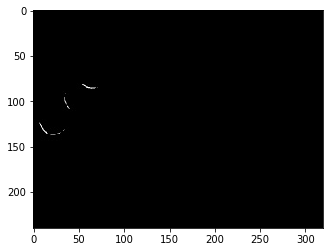

In [45]:
mask = cv2.imread("masked1.jpg")
plt.imshow(mask,cmap='gray')
print(mask.shape)

In [64]:
print(odds)

21


In [32]:
theta = 0.5
r=1
x=r*math.cos(math.radians(theta))
y=r*math.sin(math.radians(theta))
print(cx)
print(cy)
x1=int(x+cx)
y1=int(y+cy)
print(x1,y1)

0.0
0.0
0 0


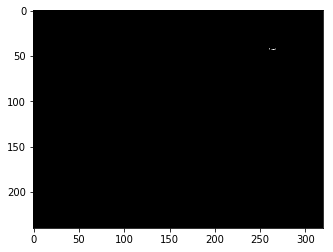

In [22]:
plt.imshow(masked,cmap='gray')

In [47]:
im4  = cv2.imread("test_results_1/original_normalized_4/DSLC0006-normalized.bmp",0)

In [48]:
print(im4.shape)

(240, 320)


In [52]:
height, width = im4.shape[:2]
res = cv2.resize(im4,(int(width/10), int(height/10)))

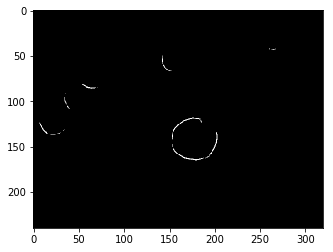

In [53]:
plt.imshow(im4,cmap='gray')